In [6]:

import os
os.chdir('/home/svenl/repos/research/pelger/missing_data_imputation/src/')

In [7]:

import os
os.chdir('/home/svenl/repos/research/pelger/missing_data_imputation/src/')
from python.plots_and_tables import section_3, plot_base, section_4, section_5, section_6, section_6_utils, section_2_missing_data, appendix
from python import data_loading
from python import imputation_utils, imputation_model, imputation_model_loading_first
import importlib
from py_imports import *

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [9]:

percentile_rank_chars, regular_chars, chars, dates,\
    return_panel, permnos, rts, monthly_updates = data_loading.get_data_panel("../data/current/raw_chars_returns_df_yearly_fb_monthly_avg_mergedizes.fthr",
                                                            "../data/ff_rf.csv",
                                                                              computstat_data_present_filter=True,
                                                                              financial_firm_filter=False,
                                                                             start_date=19770000)

Index(['A2ME', 'AC', 'AT', 'ATO', 'B2M', 'BETA_d', 'BETA_m', 'C2A', 'CF2B', 'CF2P', 'CTO', 'D2A', 'D2P', 'DPI2A', 'E2P', 'FC2Y', 'HIGH52', 'INV', 'IdioVol', 'LEV', 'ME', 'NI', 'NOA', 'OA', 'OL', 'OP', 'PCM', 'PM', 'PROF', 'Q', 'R12_2', 'R12_7', 'R2_1', 'R36_13', 'R60_13', 'RNA', 'ROA', 'ROE', 'RVAR', 'S2P', 'SGA2S', 'SPREAD', 'SUV', 'TURN', 'VAR', 'return', 'date', 'permno', 'monthly_update'], dtype='object')
['A2ME' 'AC' 'AT' 'ATO' 'B2M' 'BETA_d' 'BETA_m' 'C2A' 'CF2B' 'CF2P' 'CTO'
 'D2A' 'D2P' 'DPI2A' 'E2P' 'FC2Y' 'HIGH52' 'INV' 'IdioVol' 'LEV' 'ME' 'NI'
 'NOA' 'OA' 'OL' 'OP' 'PCM' 'PM' 'PROF' 'Q' 'R12_2' 'R12_7' 'R2_1'
 'R36_13' 'R60_13' 'RNA' 'ROA' 'ROE' 'RVAR' 'S2P' 'SGA2S' 'SPREAD' 'SUV'
 'TURN' 'VAR']


  0%|          | 0/528 [00:00<?, ?it/s]

In [10]:

char_groupings  = [('A2ME', "Q"),
                   ('AC', 'Q'),
('AT', 'Q'),
('ATO', 'Q'),
('B2M', 'QM'),
('BETA_d', 'M'),
('BETA_m', 'M'),
('C2A', 'Q'),
('CF2B', 'Q'),
('CF2P', 'QM'),
('CTO', 'Q'),
('D2A', 'Q'),
('D2P', 'M'),
('DPI2A', 'Q'),
('E2P', 'QM'),
('FC2Y', 'QY'),
('IdioVol', 'M'),
('INV', 'Q'),
('LEV', 'Q'),
('ME', 'M'),
('TURN', 'M'),
('NI', 'Q'),
('NOA', 'Q'),
('OA', 'Q'),
('OL', 'Q'),
('OP', 'Q'),
('PCM', 'Q'),
('PM', 'Q'),
('PROF', 'QY'),
('Q', 'QM'),
('R2_1', 'M'),
('R12_2', 'M'),
('R12_7', 'M'),
('R36_13', 'M'),
('R60_13', 'M'),
('HIGH52', 'M'),
('RVAR', 'M'),
('RNA', 'Q'),
('ROA', 'Q'),
('ROE', 'Q'),
('S2P', 'QM'),
('SGA2S', 'Q'),
('SPREAD', 'M'),
('SUV', 'M'),
('VAR', 'M')]
char_map = {x[0]:x[1] for x in char_groupings}

In [6]:
import numpy as np

# long only portfolios

In [7]:
from tqdm.notebook import tqdm

In [8]:
port_tgt_chars = [
    'A2ME', 
 'AT', 
 'ATO',
 'B2M',
 'C2A',
    'CF2B',
    'CF2P',
    'CTO',
    'D2A',
    'DPI2A', 
    'E2P', 
    'FC2Y',
    'INV', 
    'LEV',
    'NI',
    'NOA',
    'OA', 
    'OL',
       'OP', 
    'PCM',
    'PM',
    'PROF',
    'Q',
    'RNA',
    'ROA',
    'ROE',
    'S2P',
    'SGA2S',
]


In [175]:
dates[45], dates[156]

(19801031, 19900131)

In [186]:
port_returns = [[] for _ in chars]
port_counts = [[] for _ in chars]
size_ind = np.argwhere(chars == 'ME')[0][0]
start = 45
prev_obs_mask = np.any(~np.isnan(percentile_rank_chars[:start]), axis=0)
for t in tqdm(range(start, percentile_rank_chars.shape[0] - 6)):
    cut = np.nanquantile(regular_chars[t,:,size_ind], q=.95)
    cut = np.nanmax(regular_chars[t,:,size_ind])
    sizes = np.nan_to_num(regular_chars[t,:,size_ind])
    sizes[sizes > cut] = cut
    for i, c in enumerate(chars):
        if c in port_tgt_chars:
            p1 = np.logical_and(~np.isnan(percentile_rank_chars[t,:,i]) , ~np.isnan(regular_chars[t,:,size_ind]))
            p1 = np.logical_and(p1, ~np.isnan(return_panel[t+6]))
            p1_count = np.sum(p1)
            p1 = p1 * sizes
            p1 = p1 / np.sum(p1)

            p2 = np.logical_and(np.isnan(percentile_rank_chars[t,:,i]), prev_obs_mask[:,i]) 
            p2 = np.logical_and(p2, ~np.isnan(return_panel[t+6]))
            p2 = np.logical_and(p2, ~np.isnan(regular_chars[t,:,size_ind]))
            p2_count = np.sum(p2)
            p2 = p2 * sizes
            p2 = p2 / np.sum(p2)

            p1_ret = p1 @ np.nan_to_num(return_panel[t+6])
            p2_ret = p2 @ np.nan_to_num(return_panel[t+6])

            port_returns[i].append([p1_ret, p2_ret])
            port_counts[i].append(p2_count)
#             if p1_count > 5 and p2_count > 10:
#                 port_returns[i].append([p1_ret, p2_ret])
#             else:
#                 port_returns[i].append([p1_ret, np.nan])
        else:
            port_returns[i].append([p1_ret, np.nan])
    prev_obs_mask = np.logical_or(prev_obs_mask, ~np.isnan(percentile_rank_chars[t]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 477/477 [00:22<00:00, 21.56it/s]


In [187]:
list(zip(chars, [np.min(x) if len(x) > 0 else np.nan for x in port_counts]))

[('A2ME', 5),
 ('AC', nan),
 ('AT', 5),
 ('ATO', 13),
 ('B2M', 5),
 ('BETA_d', nan),
 ('BETA_m', nan),
 ('C2A', 8),
 ('CF2B', 6),
 ('CF2P', 6),
 ('CTO', 13),
 ('D2A', 115),
 ('D2P', nan),
 ('DPI2A', 135),
 ('E2P', 6),
 ('FC2Y', 82),
 ('HIGH52', nan),
 ('INV', 22),
 ('IdioVol', nan),
 ('LEV', 79),
 ('ME', nan),
 ('NI', 26),
 ('NOA', 12),
 ('OA', 36),
 ('OL', 8),
 ('OP', 7),
 ('PCM', 26),
 ('PM', 15),
 ('PROF', 10),
 ('Q', 5),
 ('R12_2', nan),
 ('R12_7', nan),
 ('R2_1', nan),
 ('R36_13', nan),
 ('R60_13', nan),
 ('RNA', 26),
 ('ROA', 18),
 ('ROE', 18),
 ('RVAR', nan),
 ('S2P', 6),
 ('SGA2S', 82),
 ('SPREAD', nan),
 ('SUV', nan),
 ('TURN', nan),
 ('VAR', nan)]

In [188]:
mean_returns = np.mean(port_returns, axis=1)

In [189]:
mycolors = ['#152eff', '#e67300', '#0e374c', '#6d904f', '#8b8b8b', '#30a2da', '#e5ae38', '#fc4f30', 
            '#6d904f', '#8b8b8b', '#0e374c']

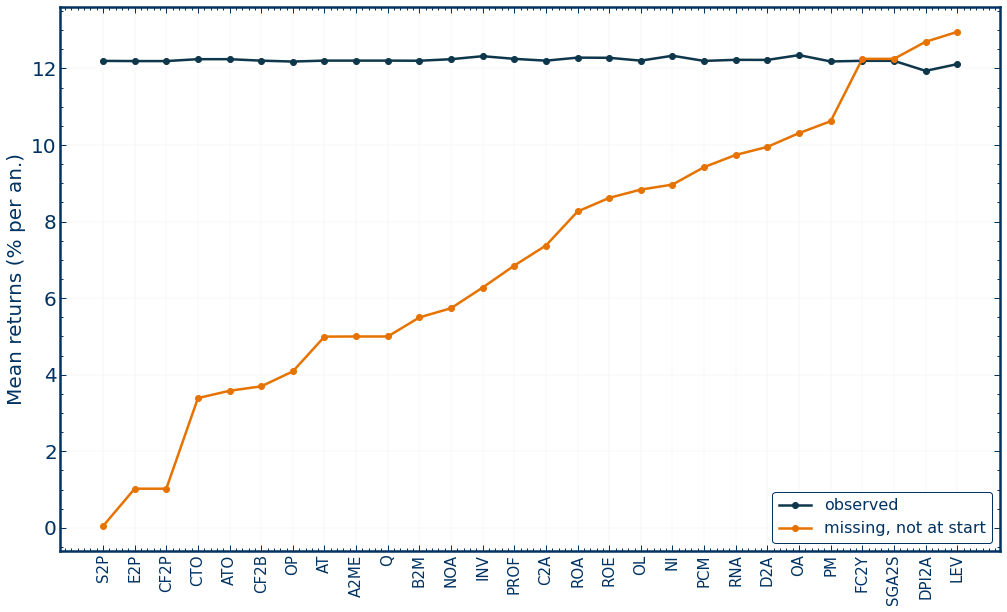

In [190]:
fig = plt.figure(figsize=(15,10))
ordering = np.argsort(mean_returns[:,1])
_ = plt.plot(np.arange(len(port_tgt_chars)), 1200*mean_returns[:,0][ordering][:len(port_tgt_chars)], 
             label='observed',
            c=mycolors[2], marker='o')
_ = plt.plot(np.arange(len(port_tgt_chars)), 1200*mean_returns[:,1][ordering][:len(port_tgt_chars)], 
             label='missing, not at start',
            c=mycolors[1], marker='o')
_ = plt.legend()
_ = plt.xticks(np.arange(len(port_tgt_chars)), chars[ordering][:len(port_tgt_chars)], rotation=90, fontsize=15)
_ = plt.ylabel("Mean returns (% per an.)")
plt.savefig(f'../images-pdfs/section6/ls-missing-obs-ports.pdf', 
                            bbox_inches='tight')
plt.show()

In [109]:
chars

array(['A2ME', 'AC', 'AT', 'ATO', 'B2M', 'BETA_d', 'BETA_m', 'C2A',
       'CF2B', 'CF2P', 'CTO', 'D2A', 'D2P', 'DPI2A', 'E2P', 'FC2Y',
       'HIGH52', 'INV', 'IdioVol', 'LEV', 'ME', 'NI', 'NOA', 'OA', 'OL',
       'OP', 'PCM', 'PM', 'PROF', 'Q', 'R12_2', 'R12_7', 'R2_1', 'R36_13',
       'R60_13', 'RNA', 'ROA', 'ROE', 'RVAR', 'S2P', 'SGA2S', 'SPREAD',
       'SUV', 'TURN', 'VAR'], dtype='<U7')

['A2ME',
 'AT',
 'ATO',
 'B2M',
 'C2A',
 'CF2B',
 'CF2P',
 'CTO',
 'D2A',
 'DPI2A',
 'E2P',
 'FC2Y',
 'INV',
 'LEV',
 'NI',
 'NOA',
 'OA',
 'OL',
 'OP',
 'PCM',
 'PM',
 'PROF',
 'Q',
 'RNA',
 'ROA',
 'ROE',
 'S2P',
 'SGA2S']

In [8]:
nyse_mask = section_6_utils.get_nyse_permnos_mask(dates, permnos, percentile_rank_chars)

In [16]:
date = 400
me_ind = np.argwhere(chars == 'ME')[0][0]
nse_qtile_cutoff = np.nanquantile(regular_chars[date,nyse_mask[date],me_ind], .10)
print(np.sum(regular_chars[date,:,me_ind] <= nse_qtile_cutoff) / np.sum(~np.isnan(regular_chars[date,:,me_ind])))

0.42335437330928766



# Comparison With other methods

In [11]:
from python.plots_and_tables import revision,revision_utils
from python import imputation_model, imputation_utils, imputation_metrics
from IPython import display
importlib.reload(imputation_metrics)
importlib.reload(imputation_utils)
importlib.reload(imputation_model)
importlib.reload(revision_utils)
importlib.reload(revision)
result = revision.ComparisonWithAlternativeMethods()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, rts, char_map)
# display(result.data_df)

<module 'python.imputation_metrics' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/imputation_metrics.py'>

<module 'python.imputation_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/imputation_utils.py'>

<module 'python.imputation_model' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/imputation_model.py'>

<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

['BETA_d', 'BETA_m', 'D2P', 'HIGH52', 'IdioVol', 'ME', 'R12_2', 'R12_7', 'R2_1', 'R36_13', 'R60_13', 'RVAR', 'SPREAD', 'SUV', 'TURN', 'VAR']


  0%|                                                                                                                                                                               | 0/4 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

/home/svenl/repos/research/pelger/missing_data_imputation/src/python/imputation_metrics.py:54: RuntimeWarning: Mean of empty slice
  mean_char_errors.append(np.nanmean(norm_func(diffs), axis=1))


  0%|          | 0/45 [00:00<?, ?it/s]

6


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
/home/svenl/environments/base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/svenl/environments/base/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed: 18.0min
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed: 35.5min
[Parallel(n_jobs=15)]: Done 258 tasks      | elapsed: 84.4min
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed: 100.7min
[Parallel(n_jobs=15)]: Done 528 out of 528 | elapsed: 108.1min finished


  0%|          | 0/45 [00:00<?, ?it/s]

 25%|████████████████████████████████████████▎                                                                                                                        | 1/4 [2:14:02<6:42:07, 8042.66s/it]

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df side-by-side

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df side-by-side

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df sid

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

6


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py:900: RuntimeWarning: invalid value encountered in true_divide
  1 - np.nansum(np.square(tgt - imputed), axis=(1,0)) /
/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py:906: RuntimeWarning: invalid value encountered in true_divide
  1 - np.nansum(np.square(tgt[:,:,monthly_char_mask] - imputed[:,:,monthly_char_mask]), axis=(1,0)) /
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:  9.7min
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed: 18.0min
[Parallel(n_jobs=15)]: Done 258 tasks      | elapsed: 26.3min
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed: 33.1min
[Parallel(n_jobs=15)]: Done 528 out of 528 | elapsed: 36.7min finished


  0%|          | 0/45 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 2/4 [3:25:24<3:14:21, 5830.65s/it]

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df side-by-side

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df side-by-side

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df sid

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

6


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed:  7.8min
[Parallel(n_jobs=15)]: Done 258 tasks      | elapsed: 14.6min
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed: 21.7min
[Parallel(n_jobs=15)]: Done 528 out of 528 | elapsed: 25.0min finished


  0%|          | 0/45 [00:00<?, ?it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 3/4 [4:13:23<1:14:42, 4482.60s/it]

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df side-by-side

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df side-by-side

Display last/all in output shell 
 from IPython.core.interactiveshell import InteractiveShell 
 InteractiveShell.ast_node_interactivity = 'all' #'last'

Stylesheet: plt.style.use(["ml_notebook"])

Frame around figure:
fig = plt.figure(linewidth=5) 
ax = fig.add_axes((.1, .11, .85, .8))


multi_table(table_list): Print df sid

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

6


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed: 13.2min
[Parallel(n_jobs=15)]: Done 258 tasks      | elapsed: 26.7min
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed: 42.1min
[Parallel(n_jobs=15)]: Done 528 out of 528 | elapsed: 49.8min finished


  0%|          | 0/45 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [5:25:05<00:00, 4876.44s/it]


In [12]:
print(result.data_df.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  aggregate-IN SAMPLE &  quarterly-IN SAMPLE &  monthly-IN SAMPLE &  aggregate-MAR &  quarterly-MAR &  monthly-MAR &  aggregate-BLOCK &  quarterly-BLOCK &  monthly-BLOCK &  aggregate-logit &  quarterly-logit &  monthly-logit \\
\midrule
local B-XS & 0.09 & 0.08 & 0.11 & 0.14 & 0.14 & 0.13 & 0.17 & 0.17 & 0.18 & 0.12 & 0.12 & 0.13 \\
local XS   & 0.19 & 0.18 & 0.20 & 0.19 & 0.19 & 0.21 & 0.19 & 0.18 & 0.20 & 0.19 & 0.19 & 0.20 \\
F\&W       & 0.24 & 0.25 & 0.22 & 0.26 & 0.26 & 0.25 & 0.26 & 0.26 & 0.25 & 0.27 & 0.27 & 0.26 \\
EM         & 0.00 & 0.00 & 0.00 & 0.17 & 0.16 & 0.19 & 0.17 & 0.16 & 0.18 & 0.17 & 0.17 & 0.18 \\
\bottomrule
\end{tabular}



In [7]:
print(result.data_df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  aggregate-MAR &  quarterly-MAR &  monthly-MAR &  aggregate-BLOCK &  quarterly-BLOCK &  monthly-BLOCK &  aggregate-logit &  quarterly-logit &  monthly-logit \\
\midrule
local B-XS & 0.14 & 0.14 & 0.13 & 0.17 & 0.17 & 0.18 & 0.12 & 0.12 & 0.13 \\
local XS   & 0.19 & 0.19 & 0.21 & 0.19 & 0.18 & 0.20 & 0.19 & 0.19 & 0.20 \\
F\&W       & 0.26 & 0.26 & 0.25 & 0.26 & 0.26 & 0.25 & 0.27 & 0.27 & 0.26 \\
EM         & 0.17 & 0.16 & 0.18 & 0.17 & 0.16 & 0.18 & 0.17 & 0.17 & 0.18 \\
\bottomrule
\end{tabular}



### Work TBD
- finalize results we want to show
- 
    

# Nonlinear IPCA Sharpes

In [257]:
np.clip([-1, -0.01, 0, 0.5, 1], -0.5, 0.5)

array([-0.5 , -0.01,  0.  ,  0.5 ,  0.5 ])

In [10]:
def ntile_basis_expansion(char_vect, n):
    ret_arr = np.zeros((char_vect.shape[0], n), dtype=float)
    ret_arr[:,:] = np.nan
    ret_arr[~np.isnan(char_vect),:] = 0
    bins = np.linspace(-0.5, 0.5, n+1)
    bin_vals = np.digitize(char_vect, bins, right=False)
    for i in range(n):
        ret_arr[bin_vals == i+1, i] = char_vect[bin_vals == i+1]
#         ret_arr[bin_vals == i+1, i] -= np.mean(ret_arr[bin_vals == i+1, i])
    return ret_arr

def get_ntile_basis_panel(chars, n):
    T, N, C = chars.shape
    ret_panel = np.zeros((T, N, C * n))
    for t in tqdm(range(T)):
        for c in range(C):
            ret_panel[t,:,c*n:(c+1)*n] = ntile_basis_expansion(chars[t,:,c], n)
    return ret_panel


In [264]:
get_ntile_basis_panel(np.array([[[0.1, 0.2, -0.1,]]]), 2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.81it/s]


array([[[ 0. ,  0.1,  0. ,  0.2, -0.1,  0. ]]])

In [268]:

imputed_chars = np.copy(percentile_rank_chars)
mask = np.isnan(imputed_chars)
imputed_chars[mask] = imputation_utils.load_imputation('local_bw_in_sample')[:-return_lag][mask]
mask = np.isnan(imputed_chars)
imputed_chars[mask] = imputation_utils.load_imputation('local_xs_in_sample')[:-return_lag][mask]
imputed_chars = np.clip(imputed_chars, -0.5, 0.5)

return_lag = 6

# percentile_rank_chars = percentile_rank_chars[:-return_lag]

# return_panel = return_panel[return_lag:]
# rts = np.array(rts)[return_lag:].reshape(-1, 1)

dec_percentile_rank_chars = get_ntile_basis_panel(percentile_rank_chars, 2)
imputed_chars = get_ntile_basis_panel(imputed_chars, 2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 522/522 [01:07<00:00,  7.71it/s]


In [269]:
from python.models import FactorModel, PCAFactorModel, IpcaModelV2
importlib.reload(IpcaModelV2)

# rts = np.array(rts)
# NUM_MONTHS_TRAIN = 240
# nfactor = 6
num_chars = 45*2
decile_chars = dec_percentile_rank_chars
imputed_decile_chars = imputed_chars

ipca_fo = IpcaModelV2.IpcaModel("fully_observed", 
                   num_factors=nfactor, recursively_calculate_gb=True, num_chars=num_chars, 
                                iter_tol=10e-6, maxiter=1000, intercept=False, alpha=0.0, l1_ratio=0.5)

ipca_imputed = IpcaModelV2.IpcaModel("imputed", 
                   num_factors=nfactor, recursively_calculate_gb=True, num_chars=num_chars, 
                                     iter_tol=10e-6, maxiter=1000, intercept=False, alpha=0.0, l1_ratio=0.5)

mask_fo = np.logical_and(np.all(~np.isnan(decile_chars), axis=2), ~np.isnan(return_panel))
mask_imputed = np.logical_and(np.all(~np.isnan(imputed_decile_chars), axis=2), ~np.isnan(return_panel))

ipca_fo.fit(return_panel - rts, char_panel=decile_chars, 
            masks=mask_fo, num_months_train=NUM_MONTHS_TRAIN)
ipca_imputed.fit(return_panel - rts, char_panel=imputed_decile_chars, 
            masks=mask_imputed, num_months_train=NUM_MONTHS_TRAIN)



# from python.models.ipca_util import calculate_sharpe_ratio, calculate_efficient_portofolio

fp_np_factors = np.copy(ipca_fo.in_factors)
print(fp_np_factors.shape)
imputed_np_factors = np.copy(ipca_imputed.in_factors)
fp_oos_mv_portfolio_returns = []
imputed_oos_mv_portfolio_returns = []
#         fp_weight = calculate_efficient_portofolio(fp_np_factors, rts[:NUM_MONTHS_TRAIN])
#         imputed_weight = calculate_efficient_portofolio(imputed_np_factors, rts[:NUM_MONTHS_TRAIN])
print(np.array(ipca_fo.out_factors).shape)
for t in tqdm(range(len(ipca_fo.out_factors))):
    np_risk_free_rates = rts[t:NUM_MONTHS_TRAIN+t]

    weights = calculate_efficient_portofolio(fp_np_factors[:,t:], np_risk_free_rates.squeeze())
    ft = ipca_fo.out_factors[t]
    oos_return = weights.T.dot(ft)
    fp_oos_mv_portfolio_returns.append(oos_return)
    fp_np_factors = np.concatenate([fp_np_factors, ft], axis=1)

    weights = calculate_efficient_portofolio(imputed_np_factors[:,t:], np_risk_free_rates.squeeze())
    ft = ipca_imputed.out_factors[t]
    oos_return = weights.T.dot(ft)
    imputed_oos_mv_portfolio_returns.append(oos_return)

    imputed_np_factors = np.concatenate([imputed_np_factors, ft], axis=1)

fp_is_weights = calculate_efficient_portofolio(ipca_fo.in_factors, rts[:NUM_MONTHS_TRAIN].squeeze())
imputed_is_weights = calculate_efficient_portofolio(ipca_imputed.in_factors, rts[:NUM_MONTHS_TRAIN].squeeze())

fp_is_returns = fp_is_weights.T.dot(ipca_fo.in_factors)
imputed_is_returns = imputed_is_weights.T.dot(ipca_imputed.in_factors)

fp_sharpes = (calculate_sharpe_ratio(np.array(fp_is_returns) - rts[:NUM_MONTHS_TRAIN]),
             calculate_sharpe_ratio(np.array(fp_oos_mv_portfolio_returns) - rts[NUM_MONTHS_TRAIN:]))

imputed_sharpes = (calculate_sharpe_ratio(np.array(imputed_is_returns) - rts[:NUM_MONTHS_TRAIN]),
             calculate_sharpe_ratio(np.array(imputed_oos_mv_portfolio_returns) - rts[NUM_MONTHS_TRAIN:]))

fp_sharpes, imputed_sharpes



<module 'python.models.IpcaModelV2' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/models/IpcaModelV2.py'>

fitting on the train data
10000
1000
l-1
The panel dimensions are: fucked 
n_samples: 4252 , L: 90 , T: 240


[=====================================================================================================================================================================================================] 100%


l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [00:00<00:00, 843.29it/s]


fitting on the train data
10000
1000
l-1


The panel dimensions are: fucked 
n_samples: 15166 , L: 90 , T: 240


[=====================================================================================================================================================================================================] 100%


l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [00:00<00:00, 294.55it/s]


(6, 240)
(282, 6, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [00:00<00:00, 2187.28it/s]


((0.6697608473032386, 0.4531157307118124),
 (1.377334233775317, 0.6878325358567859))

In [243]:
rts.shape

(522, 1)

In [238]:
NUM_MONTHS_TRAIN

240

<module 'python.models.IpcaModelV2' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/models/IpcaModelV2.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

(522, 22351) (522,)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 528/528 [01:39<00:00,  5.30it/s]



fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.13052145205847832 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 290.09it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.000601326745421793 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:02<00:00, 103.81it/s]


(3, 280)
(3, 280)
(241, 3, 1)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1400.90it/s]


0 (280,) (3, 280)
1 (280,) (3, 281)
2 (280,) (3, 282)
3 (280,) (3, 283)
4 (280,) (3, 284)
5 (280,) (3, 285)
6 (280,) (3, 286)
7 (280,) (3, 287)
8 (280,) (3, 288)
9 (280,) (3, 289)
10 (280,) (3, 290)
11 (280,) (3, 291)
12 (280,) (3, 292)
13 (280,) (3, 293)
14 (280,) (3, 294)
15 (280,) (3, 295)
16 (280,) (3, 296)
17 (280,) (3, 297)
18 (280,) (3, 298)
19 (280,) (3, 299)
20 (280,) (3, 300)
21 (280,) (3, 301)
22 (280,) (3, 302)
23 (280,) (3, 303)
24 (280,) (3, 304)
25 (280,) (3, 305)
26 (280,) (3, 306)
27 (280,) (3, 307)
28 (280,) (3, 308)
29 (280,) (3, 309)
30 (280,) (3, 310)
31 (280,) (3, 311)
32 (280,) (3, 312)
33 (280,) (3, 313)
34 (280,) (3, 314)
35 (280,) (3, 315)
36 (280,) (3, 316)
37 (280,) (3, 317)
38 (280,) (3, 318)
39 (280,) (3, 319)
40 (280,) (3, 320)
41 (280,) (3, 321)
42 (280,) (3, 322)
43 (280,) (3, 323)
44 (280,) (3, 324)
45 (280,) (3, 325)
46 (280,) (3, 326)
47 (280,) (3, 327)
48 (280,) (3, 328)
49 (280,) (3, 329)
50 (280,) (3, 330)
51 (280,) (3, 331)
52 (280,) (3, 332)
53 

The panel dimensions are: fucked 
n_samples: 5139 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.014802803914867935 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 507.01it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.003904141929828242 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:02<00:00, 95.00it/s]


(4, 280)
(4, 280)
(241, 4, 1)


 44%|███████████████████████████████████████████████████████████████████████▍                                                                                         | 107/241 [00:00<00:00, 1065.46it/s]

0 (280,) (4, 280)
1 (280,) (4, 281)
2 (280,) (4, 282)
3 (280,) (4, 283)
4 (280,) (4, 284)
5 (280,) (4, 285)
6 (280,) (4, 286)
7 (280,) (4, 287)
8 (280,) (4, 288)
9 (280,) (4, 289)
10 (280,) (4, 290)
11 (280,) (4, 291)
12 (280,) (4, 292)
13 (280,) (4, 293)
14 (280,) (4, 294)
15 (280,) (4, 295)
16 (280,) (4, 296)
17 (280,) (4, 297)
18 (280,) (4, 298)
19 (280,) (4, 299)
20 (280,) (4, 300)
21 (280,) (4, 301)
22 (280,) (4, 302)
23 (280,) (4, 303)
24 (280,) (4, 304)
25 (280,) (4, 305)
26 (280,) (4, 306)
27 (280,) (4, 307)
28 (280,) (4, 308)
29 (280,) (4, 309)
30 (280,) (4, 310)
31 (280,) (4, 311)
32 (280,) (4, 312)
33 (280,) (4, 313)
34 (280,) (4, 314)
35 (280,) (4, 315)
36 (280,) (4, 316)
37 (280,) (4, 317)
38 (280,) (4, 318)
39 (280,) (4, 319)
40 (280,) (4, 320)
41 (280,) (4, 321)
42 (280,) (4, 322)
43 (280,) (4, 323)
44 (280,) (4, 324)
45 (280,) (4, 325)
46 (280,) (4, 326)
47 (280,) (4, 327)
48 (280,) (4, 328)
49 (280,) (4, 329)
50 (280,) (4, 330)
51 (280,) (4, 331)
52 (280,) (4, 332)
53 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 974.92it/s]


202 (280,) (4, 482)
203 (280,) (4, 483)
204 (280,) (4, 484)
205 (280,) (4, 485)
206 (280,) (4, 486)
207 (280,) (4, 487)
208 (280,) (4, 488)
209 (280,) (4, 489)
210 (280,) (4, 490)
211 (280,) (4, 491)
212 (280,) (4, 492)
213 (280,) (4, 493)
214 (280,) (4, 494)
215 (280,) (4, 495)
216 (280,) (4, 496)
217 (280,) (4, 497)
218 (280,) (4, 498)
219 (280,) (4, 499)
220 (280,) (4, 500)
221 (280,) (4, 501)
222 (280,) (4, 502)
223 (280,) (4, 503)
224 (280,) (4, 504)
225 (280,) (4, 505)
226 (280,) (4, 506)
227 (280,) (4, 507)
228 (280,) (4, 508)
229 (280,) (4, 509)
230 (280,) (4, 510)
231 (280,) (4, 511)
232 (280,) (4, 512)
233 (280,) (4, 513)
234 (280,) (4, 514)
235 (280,) (4, 515)
236 (280,) (4, 516)
237 (280,) (4, 517)
238 (280,) (4, 518)
239 (280,) (4, 519)
240 (280,) (4, 520)

fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.09303074297198632 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 263.80it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.027149404281638645 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:02<00:00, 96.43it/s]


(5, 280)
(5, 280)
(241, 5, 1)


 50%|████████████████████████████████████████████████████████████████████████████████▏                                                                                | 120/241 [00:00<00:00, 1191.12it/s]

0 (280,) (5, 280)
1 (280,) (5, 281)
2 (280,) (5, 282)
3 (280,) (5, 283)
4 (280,) (5, 284)
5 (280,) (5, 285)
6 (280,) (5, 286)
7 (280,) (5, 287)
8 (280,) (5, 288)
9 (280,) (5, 289)
10 (280,) (5, 290)
11 (280,) (5, 291)
12 (280,) (5, 292)
13 (280,) (5, 293)
14 (280,) (5, 294)
15 (280,) (5, 295)
16 (280,) (5, 296)
17 (280,) (5, 297)
18 (280,) (5, 298)
19 (280,) (5, 299)
20 (280,) (5, 300)
21 (280,) (5, 301)
22 (280,) (5, 302)
23 (280,) (5, 303)
24 (280,) (5, 304)
25 (280,) (5, 305)
26 (280,) (5, 306)
27 (280,) (5, 307)
28 (280,) (5, 308)
29 (280,) (5, 309)
30 (280,) (5, 310)
31 (280,) (5, 311)
32 (280,) (5, 312)
33 (280,) (5, 313)
34 (280,) (5, 314)
35 (280,) (5, 315)
36 (280,) (5, 316)
37 (280,) (5, 317)
38 (280,) (5, 318)
39 (280,) (5, 319)
40 (280,) (5, 320)
41 (280,) (5, 321)
42 (280,) (5, 322)
43 (280,) (5, 323)
44 (280,) (5, 324)
45 (280,) (5, 325)
46 (280,) (5, 326)
47 (280,) (5, 327)
48 (280,) (5, 328)
49 (280,) (5, 329)
50 (280,) (5, 330)
51 (280,) (5, 331)
52 (280,) (5, 332)
53 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1117.66it/s]


227 (280,) (5, 507)
228 (280,) (5, 508)
229 (280,) (5, 509)
230 (280,) (5, 510)
231 (280,) (5, 511)
232 (280,) (5, 512)
233 (280,) (5, 513)
234 (280,) (5, 514)
235 (280,) (5, 515)
236 (280,) (5, 516)
237 (280,) (5, 517)
238 (280,) (5, 518)
239 (280,) (5, 519)
240 (280,) (5, 520)

fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.4654043828285328 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 249.52it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 1.111240671881111 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:02<00:00, 83.00it/s]


(6, 280)
(6, 280)
(241, 6, 1)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1377.51it/s]

0 (280,) (6, 280)
1 (280,) (6, 281)
2 (280,) (6, 282)
3 (280,) (6, 283)
4 (280,) (6, 284)
5 (280,) (6, 285)
6 (280,) (6, 286)
7 (280,) (6, 287)
8 (280,) (6, 288)
9 (280,) (6, 289)
10 (280,) (6, 290)
11 (280,) (6, 291)
12 (280,) (6, 292)
13 (280,) (6, 293)
14 (280,) (6, 294)
15 (280,) (6, 295)
16 (280,) (6, 296)
17 (280,) (6, 297)
18 (280,) (6, 298)
19 (280,) (6, 299)
20 (280,) (6, 300)
21 (280,) (6, 301)
22 (280,) (6, 302)
23 (280,) (6, 303)
24 (280,) (6, 304)
25 (280,) (6, 305)
26 (280,) (6, 306)
27 (280,) (6, 307)
28 (280,) (6, 308)
29 (280,) (6, 309)
30 (280,) (6, 310)
31 (280,) (6, 311)
32 (280,) (6, 312)
33 (280,) (6, 313)
34 (280,) (6, 314)
35 (280,) (6, 315)
36 (280,) (6, 316)
37 (280,) (6, 317)
38 (280,) (6, 318)
39 (280,) (6, 319)
40 (280,) (6, 320)
41 (280,) (6, 321)
42 (280,) (6, 322)
43 (280,) (6, 323)
44 (280,) (6, 324)
45 (280,) (6, 325)
46 (280,) (6, 326)
47 (280,) (6, 327)
48 (280,) (6, 328)
49 (280,) (6, 329)
50 (280,) (6, 330)
51 (280,) (6, 331)
52 (280,) (6, 332)
53 

fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.25715084333022364 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 431.65it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.031066162596042057 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:03<00:00, 70.16it/s]


(7, 280)
(7, 280)
(241, 7, 1)


 41%|██████████████████████████████████████████████████████████████████▉                                                                                                | 99/241 [00:00<00:00, 989.79it/s]

0 (280,) (7, 280)
1 (280,) (7, 281)
2 (280,) (7, 282)
3 (280,) (7, 283)
4 (280,) (7, 284)
5 (280,) (7, 285)
6 (280,) (7, 286)
7 (280,) (7, 287)
8 (280,) (7, 288)
9 (280,) (7, 289)
10 (280,) (7, 290)
11 (280,) (7, 291)
12 (280,) (7, 292)
13 (280,) (7, 293)
14 (280,) (7, 294)
15 (280,) (7, 295)
16 (280,) (7, 296)
17 (280,) (7, 297)
18 (280,) (7, 298)
19 (280,) (7, 299)
20 (280,) (7, 300)
21 (280,) (7, 301)
22 (280,) (7, 302)
23 (280,) (7, 303)
24 (280,) (7, 304)
25 (280,) (7, 305)
26 (280,) (7, 306)
27 (280,) (7, 307)
28 (280,) (7, 308)
29 (280,) (7, 309)
30 (280,) (7, 310)
31 (280,) (7, 311)
32 (280,) (7, 312)
33 (280,) (7, 313)
34 (280,) (7, 314)
35 (280,) (7, 315)
36 (280,) (7, 316)
37 (280,) (7, 317)
38 (280,) (7, 318)
39 (280,) (7, 319)
40 (280,) (7, 320)
41 (280,) (7, 321)
42 (280,) (7, 322)
43 (280,) (7, 323)
44 (280,) (7, 324)
45 (280,) (7, 325)
46 (280,) (7, 326)
47 (280,) (7, 327)
48 (280,) (7, 328)
49 (280,) (7, 329)
50 (280,) (7, 330)
51 (280,) (7, 331)
52 (280,) (7, 332)
53 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 954.05it/s]


194 (280,) (7, 474)
195 (280,) (7, 475)
196 (280,) (7, 476)
197 (280,) (7, 477)
198 (280,) (7, 478)
199 (280,) (7, 479)
200 (280,) (7, 480)
201 (280,) (7, 481)
202 (280,) (7, 482)
203 (280,) (7, 483)
204 (280,) (7, 484)
205 (280,) (7, 485)
206 (280,) (7, 486)
207 (280,) (7, 487)
208 (280,) (7, 488)
209 (280,) (7, 489)
210 (280,) (7, 490)
211 (280,) (7, 491)
212 (280,) (7, 492)
213 (280,) (7, 493)
214 (280,) (7, 494)
215 (280,) (7, 495)
216 (280,) (7, 496)
217 (280,) (7, 497)
218 (280,) (7, 498)
219 (280,) (7, 499)
220 (280,) (7, 500)
221 (280,) (7, 501)
222 (280,) (7, 502)
223 (280,) (7, 503)
224 (280,) (7, 504)
225 (280,) (7, 505)
226 (280,) (7, 506)
227 (280,) (7, 507)
228 (280,) (7, 508)
229 (280,) (7, 509)
230 (280,) (7, 510)
231 (280,) (7, 511)
232 (280,) (7, 512)
233 (280,) (7, 513)
234 (280,) (7, 514)
235 (280,) (7, 515)
236 (280,) (7, 516)
237 (280,) (7, 517)
238 (280,) (7, 518)
239 (280,) (7, 519)
240 (280,) (7, 520)

fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.4031274597293535 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 273.27it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.044552605959866314 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:03<00:00, 77.23it/s]


(8, 280)
(8, 280)
(241, 8, 1)


 36%|██████████████████████████████████████████████████████████▏                                                                                                        | 86/241 [00:00<00:00, 853.79it/s]

0 (280,) (8, 280)
1 (280,) (8, 281)
2 (280,) (8, 282)
3 (280,) (8, 283)
4 (280,) (8, 284)
5 (280,) (8, 285)
6 (280,) (8, 286)
7 (280,) (8, 287)
8 (280,) (8, 288)
9 (280,) (8, 289)
10 (280,) (8, 290)
11 (280,) (8, 291)
12 (280,) (8, 292)
13 (280,) (8, 293)
14 (280,) (8, 294)
15 (280,) (8, 295)
16 (280,) (8, 296)
17 (280,) (8, 297)
18 (280,) (8, 298)
19 (280,) (8, 299)
20 (280,) (8, 300)
21 (280,) (8, 301)
22 (280,) (8, 302)
23 (280,) (8, 303)
24 (280,) (8, 304)
25 (280,) (8, 305)
26 (280,) (8, 306)
27 (280,) (8, 307)
28 (280,) (8, 308)
29 (280,) (8, 309)
30 (280,) (8, 310)
31 (280,) (8, 311)
32 (280,) (8, 312)
33 (280,) (8, 313)
34 (280,) (8, 314)
35 (280,) (8, 315)
36 (280,) (8, 316)
37 (280,) (8, 317)
38 (280,) (8, 318)
39 (280,) (8, 319)
40 (280,) (8, 320)
41 (280,) (8, 321)
42 (280,) (8, 322)
43 (280,) (8, 323)
44 (280,) (8, 324)
45 (280,) (8, 325)
46 (280,) (8, 326)
47 (280,) (8, 327)
48 (280,) (8, 328)
49 (280,) (8, 329)
50 (280,) (8, 330)
51 (280,) (8, 331)
52 (280,) (8, 332)
53 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 683.73it/s]

138 (280,) (8, 418)
139 (280,) (8, 419)
140 (280,) (8, 420)
141 (280,) (8, 421)
142 (280,) (8, 422)
143 (280,) (8, 423)
144 (280,) (8, 424)
145 (280,) (8, 425)
146 (280,) (8, 426)
147 (280,) (8, 427)
148 (280,) (8, 428)
149 (280,) (8, 429)
150 (280,) (8, 430)
151 (280,) (8, 431)
152 (280,) (8, 432)
153 (280,) (8, 433)
154 (280,) (8, 434)
155 (280,) (8, 435)
156 (280,) (8, 436)
157 (280,) (8, 437)
158 (280,) (8, 438)
159 (280,) (8, 439)
160 (280,) (8, 440)
161 (280,) (8, 441)
162 (280,) (8, 442)
163 (280,) (8, 443)
164 (280,) (8, 444)
165 (280,) (8, 445)
166 (280,) (8, 446)
167 (280,) (8, 447)
168 (280,) (8, 448)
169 (280,) (8, 449)
170 (280,) (8, 450)
171 (280,) (8, 451)
172 (280,) (8, 452)
173 (280,) (8, 453)
174 (280,) (8, 454)
175 (280,) (8, 455)
176 (280,) (8, 456)
177 (280,) (8, 457)
178 (280,) (8, 458)
179 (280,) (8, 459)
180 (280,) (8, 460)
181 (280,) (8, 461)
182 (280,) (8, 462)
183 (280,) (8, 463)
184 (280,) (8, 464)
185 (280,) (8, 465)
186 (280,) (8, 466)
187 (280,) (8, 467)


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 1.4418797320911816 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 442.58it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 90 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.03629506386375756 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:03<00:00, 71.12it/s]


(9, 280)
(9, 280)
(241, 9, 1)


 49%|██████████████████████████████████████████████████████████████████████████████▊                                                                                  | 118/241 [00:00<00:00, 1177.97it/s]

0 (280,) (9, 280)
1 (280,) (9, 281)
2 (280,) (9, 282)
3 (280,) (9, 283)
4 (280,) (9, 284)
5 (280,) (9, 285)
6 (280,) (9, 286)
7 (280,) (9, 287)
8 (280,) (9, 288)
9 (280,) (9, 289)
10 (280,) (9, 290)
11 (280,) (9, 291)
12 (280,) (9, 292)
13 (280,) (9, 293)
14 (280,) (9, 294)
15 (280,) (9, 295)
16 (280,) (9, 296)
17 (280,) (9, 297)
18 (280,) (9, 298)
19 (280,) (9, 299)
20 (280,) (9, 300)
21 (280,) (9, 301)
22 (280,) (9, 302)
23 (280,) (9, 303)
24 (280,) (9, 304)
25 (280,) (9, 305)
26 (280,) (9, 306)
27 (280,) (9, 307)
28 (280,) (9, 308)
29 (280,) (9, 309)
30 (280,) (9, 310)
31 (280,) (9, 311)
32 (280,) (9, 312)
33 (280,) (9, 313)
34 (280,) (9, 314)
35 (280,) (9, 315)
36 (280,) (9, 316)
37 (280,) (9, 317)
38 (280,) (9, 318)
39 (280,) (9, 319)
40 (280,) (9, 320)
41 (280,) (9, 321)
42 (280,) (9, 322)
43 (280,) (9, 323)
44 (280,) (9, 324)
45 (280,) (9, 325)
46 (280,) (9, 326)
47 (280,) (9, 327)
48 (280,) (9, 328)
49 (280,) (9, 329)
50 (280,) (9, 330)
51 (280,) (9, 331)
52 (280,) (9, 332)
53 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1108.05it/s]


232 (280,) (9, 512)
233 (280,) (9, 513)
234 (280,) (9, 514)
235 (280,) (9, 515)
236 (280,) (9, 516)
237 (280,) (9, 517)
238 (280,) (9, 518)
239 (280,) (9, 519)
240 (280,) (9, 520)


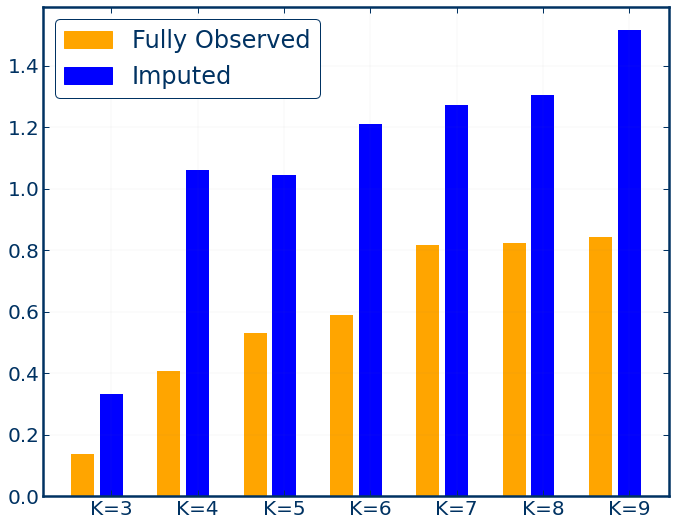

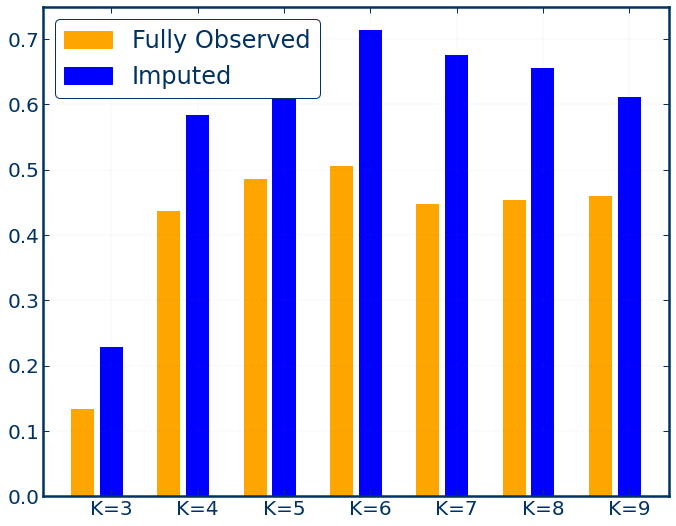

In [27]:
from python.plots_and_tables import revision
from python.models import IpcaModelV2
importlib.reload(IpcaModelV2)
importlib.reload(revision)
result = revision.NonlinearIPCA()
result.setup(percentile_rank_chars, return_panel,
             char_groupings, chars, 
             np.array(rts), expansion_dim=2)

In [16]:
result.expansion_dim

AttributeError: 'NonlinearIPCA' object has no attribute 'expansion_dim'

In [28]:
print(result.data_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  IS Observed &  OOS Observed &  IS Imputed &  OOS Imputed \\
\midrule
k=3 & 0.14 & 0.13 & 0.33 & 0.23 \\
k=4 & 0.41 & 0.44 & 1.06 & 0.58 \\
k=5 & 0.53 & 0.49 & 1.04 & 0.66 \\
k=6 & 0.59 & 0.51 & 1.21 & 0.71 \\
k=7 & 0.82 & 0.45 & 1.27 & 0.68 \\
k=8 & 0.82 & 0.45 & 1.31 & 0.66 \\
k=9 & 0.84 & 0.46 & 1.51 & 0.61 \\
\bottomrule
\end{tabular}



<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

(522, 22351) (522,)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 528/528 [04:19<00:00,  2.03it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.4168172253777711 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:07<00:00, 33.73it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.00019863192053903855 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1228.73it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 3.0816167157583507 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:03<00:00, 76.56it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.057894624991182475 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1440.49it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 1.8634897749554966 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:03<00:00, 73.80it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.14631889020136668 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1279.61it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 3.6795352101820527 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:05<00:00, 46.25it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.29954012733535507 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1360.47it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 1.175813986745709 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:03<00:00, 71.24it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.32121076730098097 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 734.11it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 2.247038153428548 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:03<00:00, 65.62it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.16975583894383917 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 491.49it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 5139 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 6.635590826278531 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:02<00:00, 98.98it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: fucked 
n_samples: 17082 , L: 450 , T: 280


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 3.6507732399148005 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 934.37it/s]


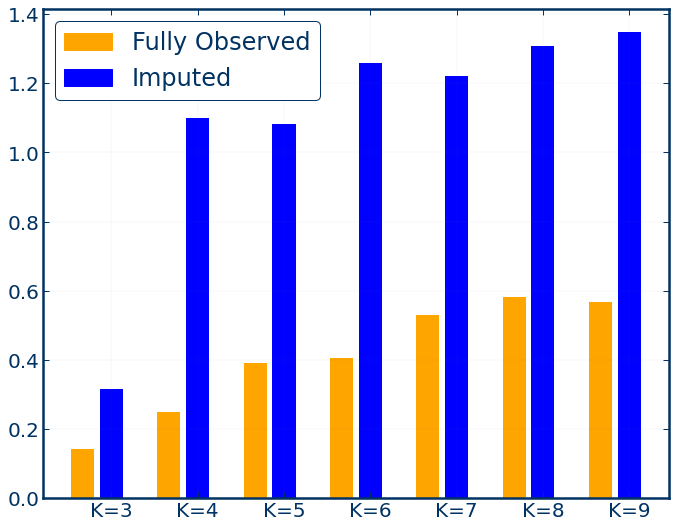

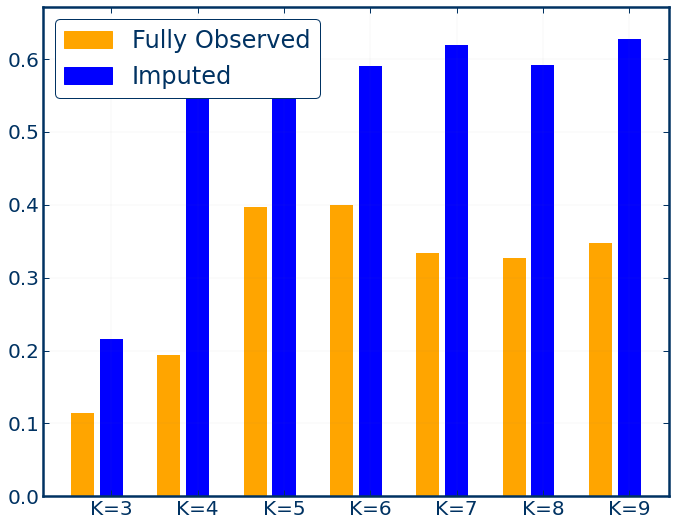

In [29]:
from python.plots_and_tables import revision
importlib.reload(revision)
result = revision.NonlinearIPCA()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars, np.array(rts), expansion_dim=10)

In [30]:
print(result.data_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  IS Observed &  OOS Observed &  IS Imputed &  OOS Imputed \\
\midrule
k=3 & 0.14 & 0.11 & 0.32 & 0.22 \\
k=4 & 0.25 & 0.19 & 1.10 & 0.63 \\
k=5 & 0.39 & 0.40 & 1.08 & 0.64 \\
k=6 & 0.41 & 0.40 & 1.26 & 0.59 \\
k=7 & 0.53 & 0.33 & 1.22 & 0.62 \\
k=8 & 0.58 & 0.33 & 1.31 & 0.59 \\
k=9 & 0.57 & 0.35 & 1.35 & 0.63 \\
\bottomrule
\end{tabular}



In [ ]:
2

# Sparse Loadings

<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

allowing a mean False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   5 out of  10 | elapsed:   48.8s remaining:   48.8s
[Parallel(n_jobs=30)]: Done   8 out of  10 | elapsed:   48.8s remaining:   12.2s
[Parallel(n_jobs=30)]: Done  10 out of  10 | elapsed:   48.9s finished


  0%|          | 0/10 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.15229088814273395
lmbda_norms [[0.93 0.73 0.59 0.42 0.4  0.38 0.36 0.33 0.33 0.31]]
getting sparse lmbda
45 10 100
constructed problem
solved problem 226.0212414264679
before regression [75.41413978997883]
[((22351, 10), (22351, 10))]
after regression [48.39518000572926]
iteration 1 delta was 3530697556.810224, lmbda net delta was 0.509480714582818
getting sparse lmbda
45 10 100
constructed problem
solved problem 224.30253314971924
before regression [77.18593462104201]
[((22351, 10), (22351, 10))]
after regression [43.81025331970731]
iteration 2 delta was 37437029905.72404, lmbda net delta was 0.38822450018393223
getting sparse lmbda
45 10 100
constructed problem
solved problem 245.2913932800293
before regression [76.89229952569971]
[((22351, 10), (22351, 10))]
after regression [51.63468638648465]


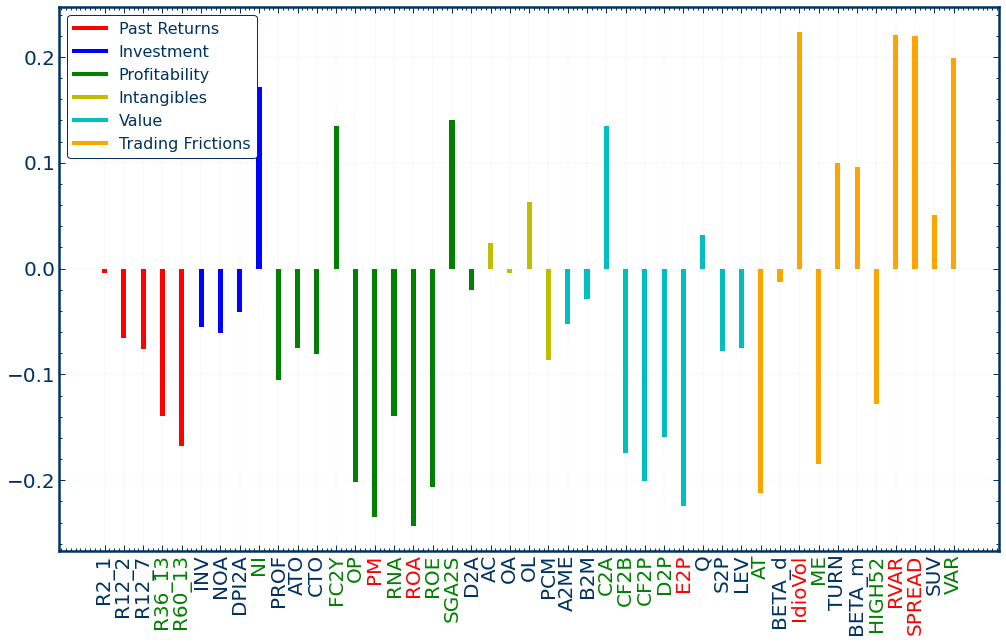

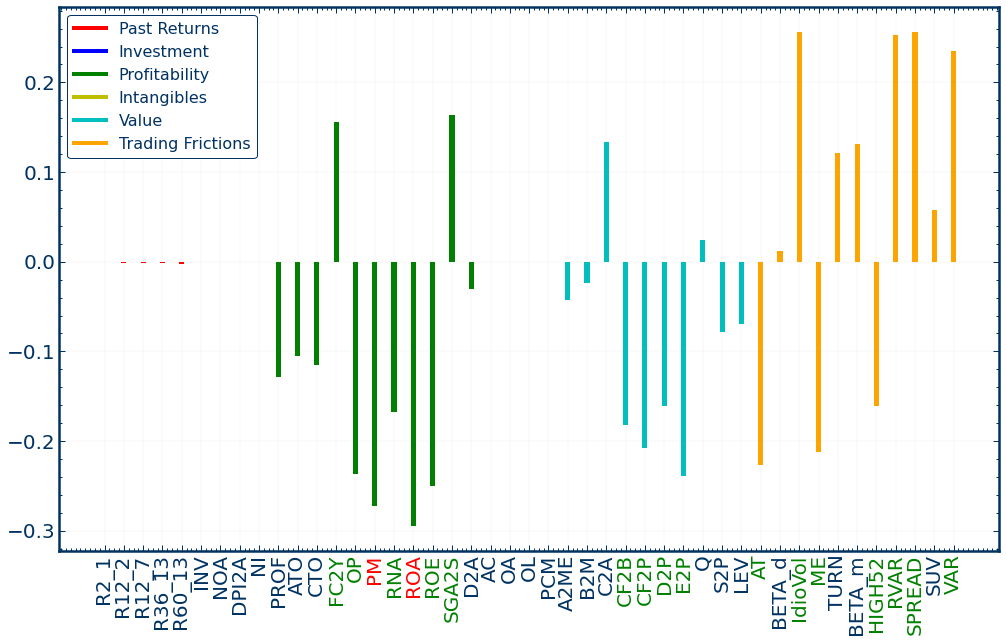

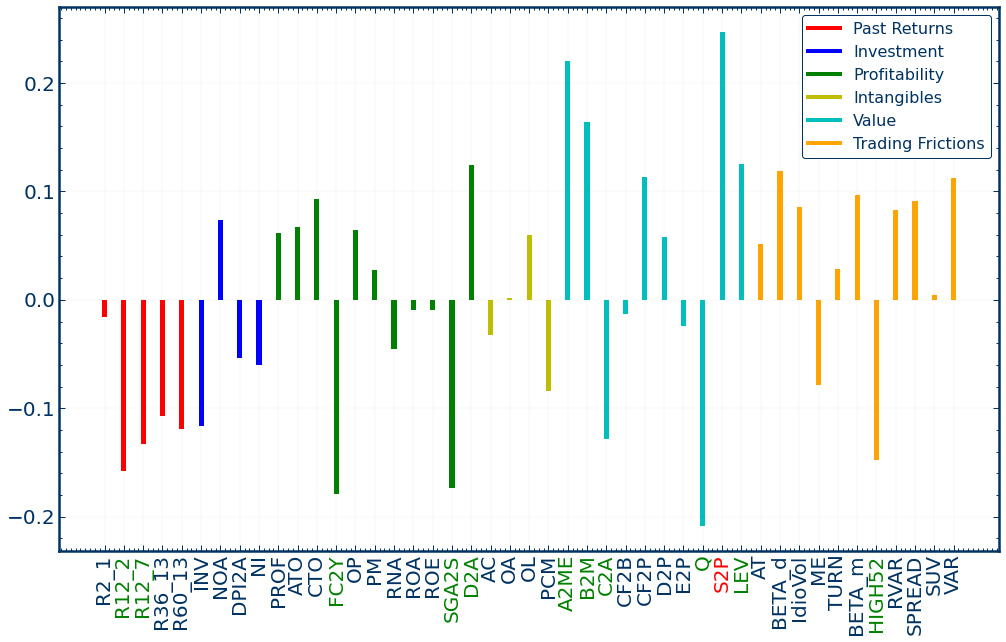

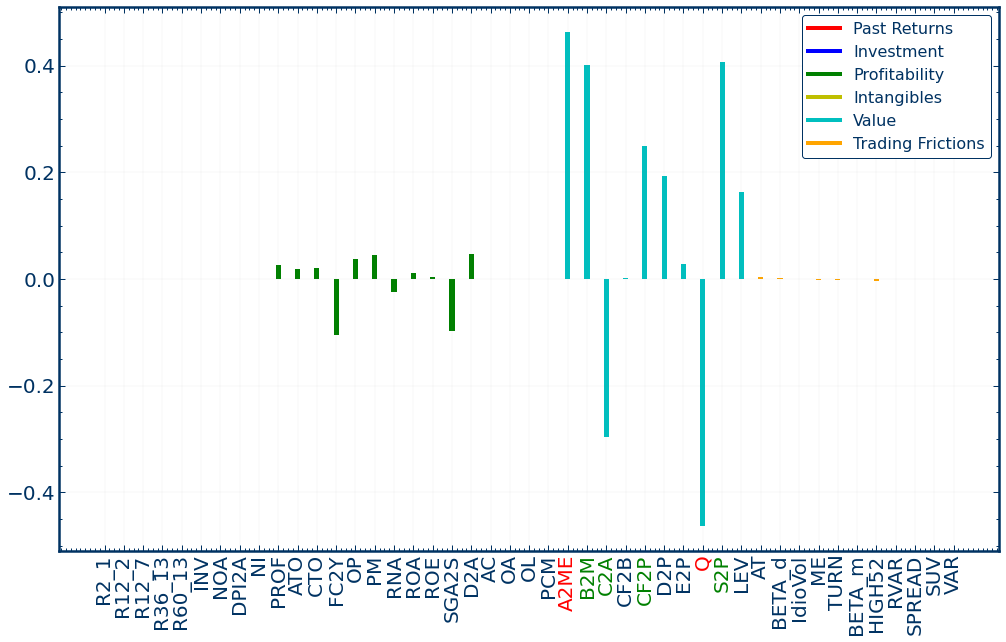

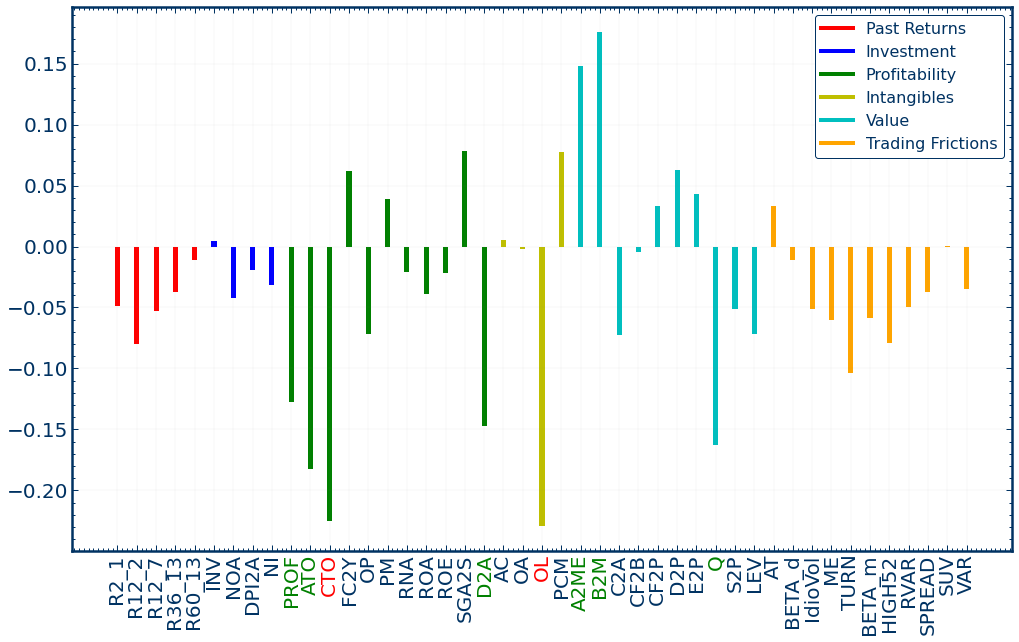

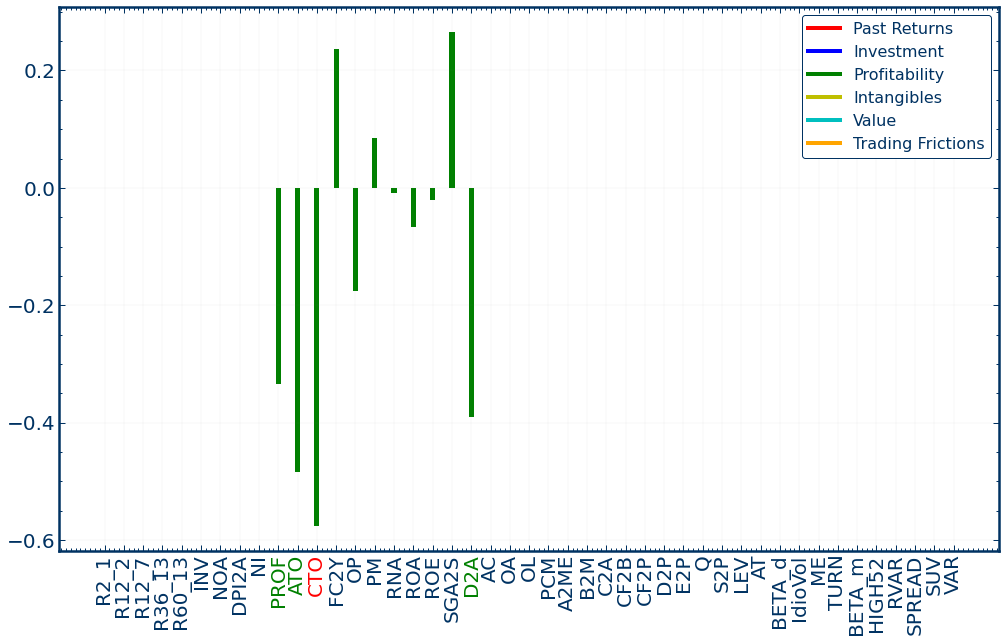

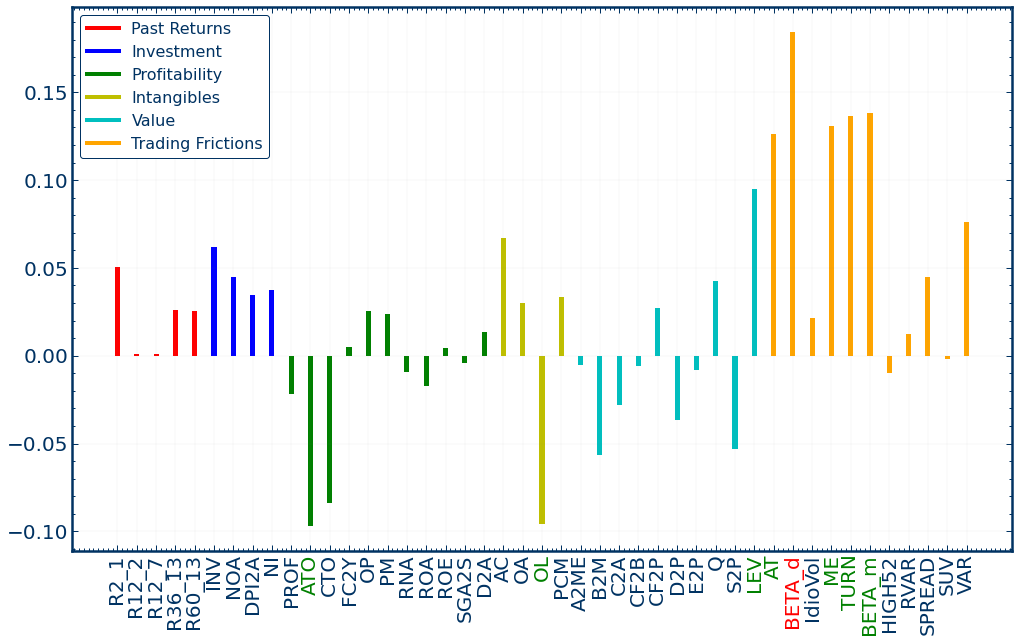

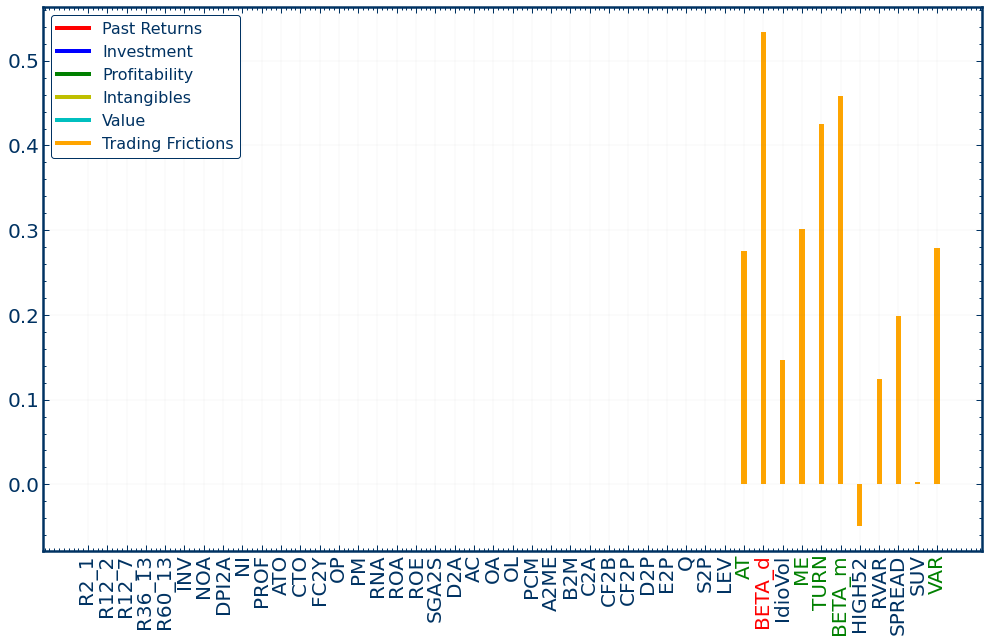

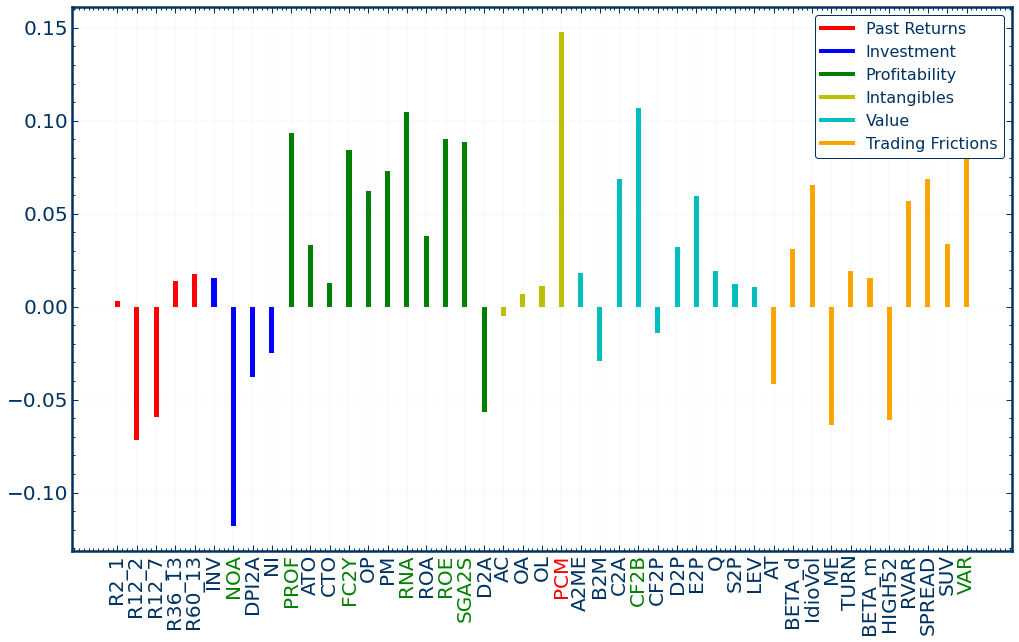

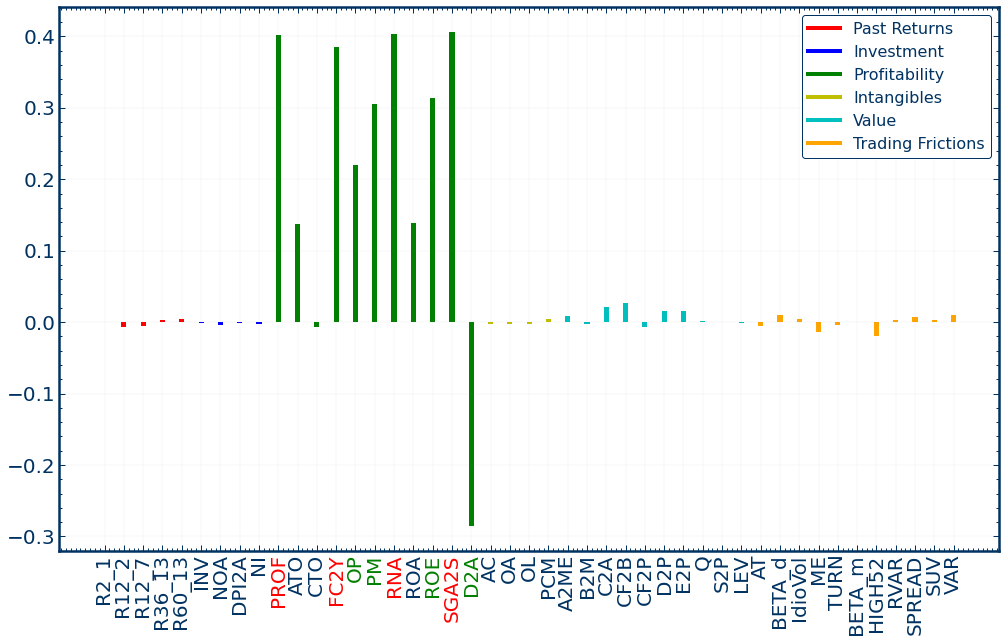

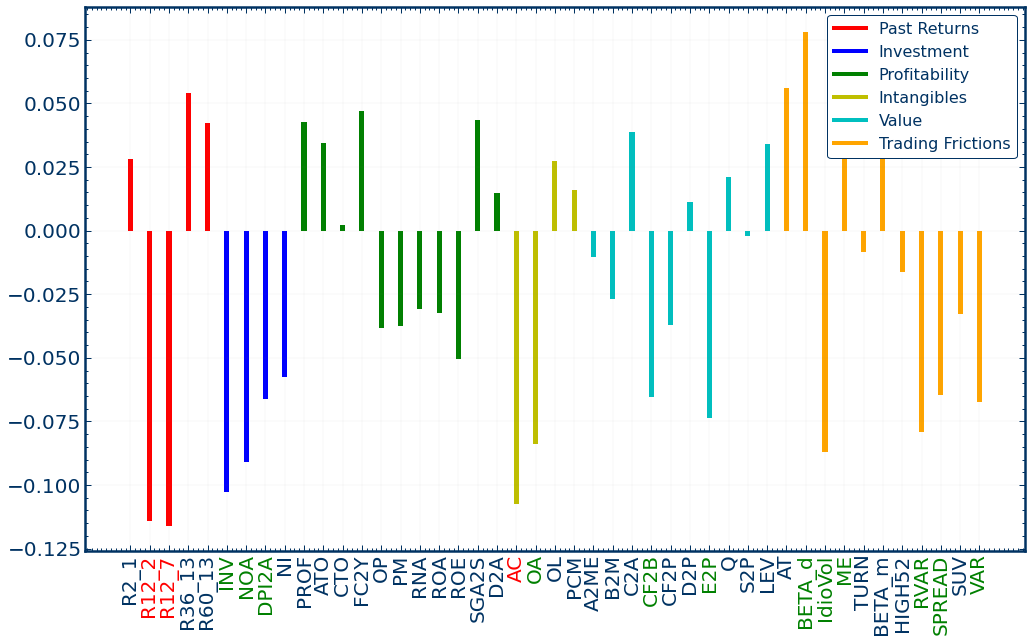

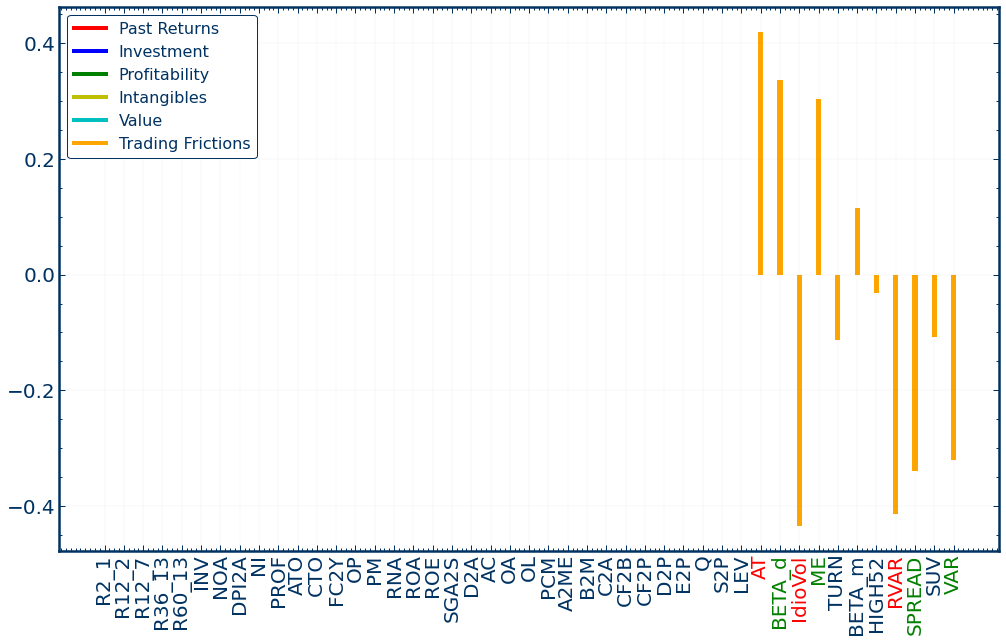

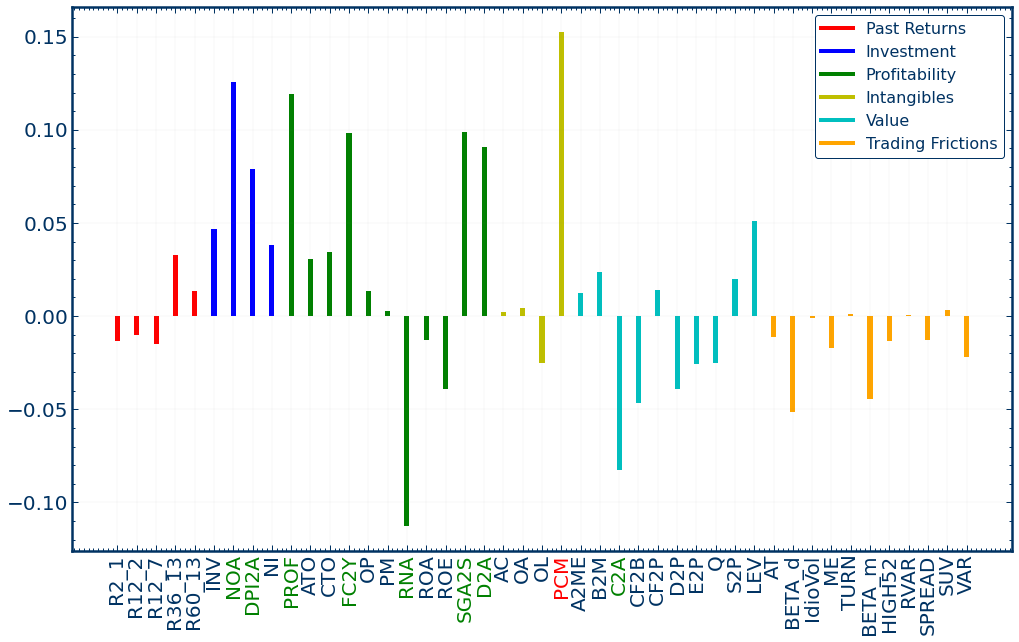

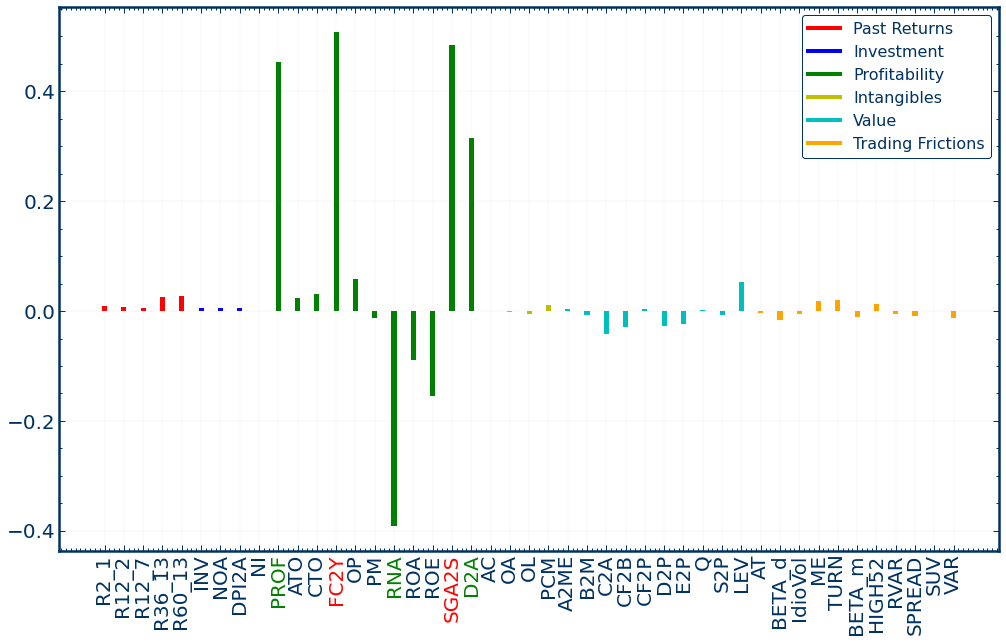

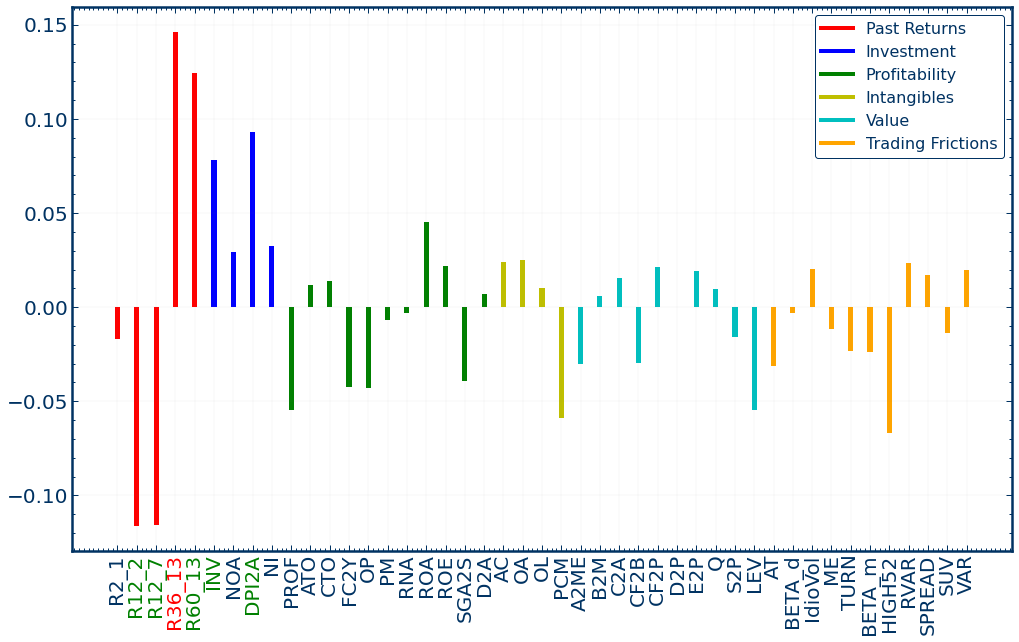

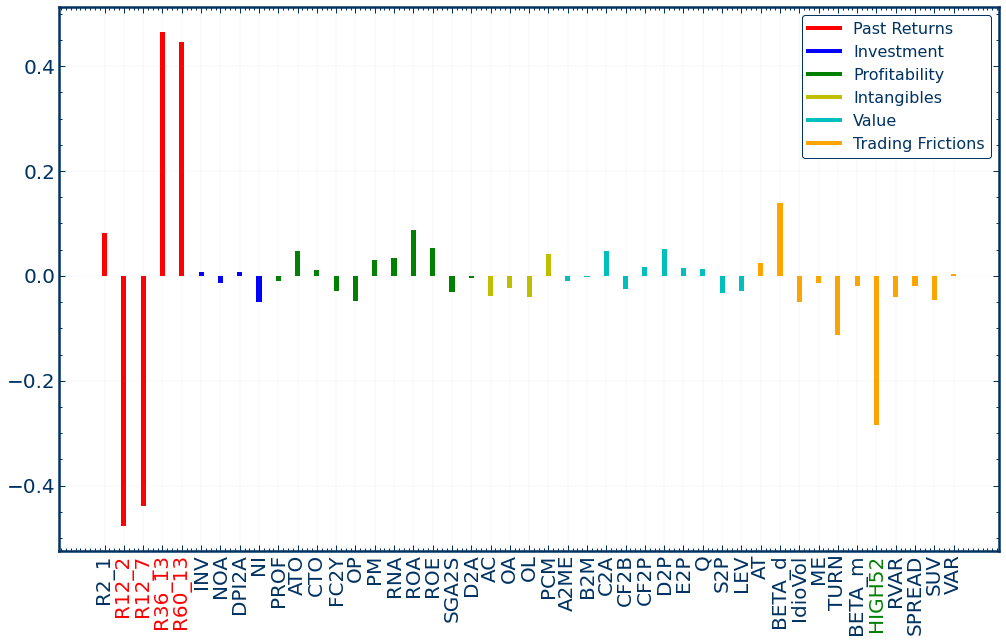

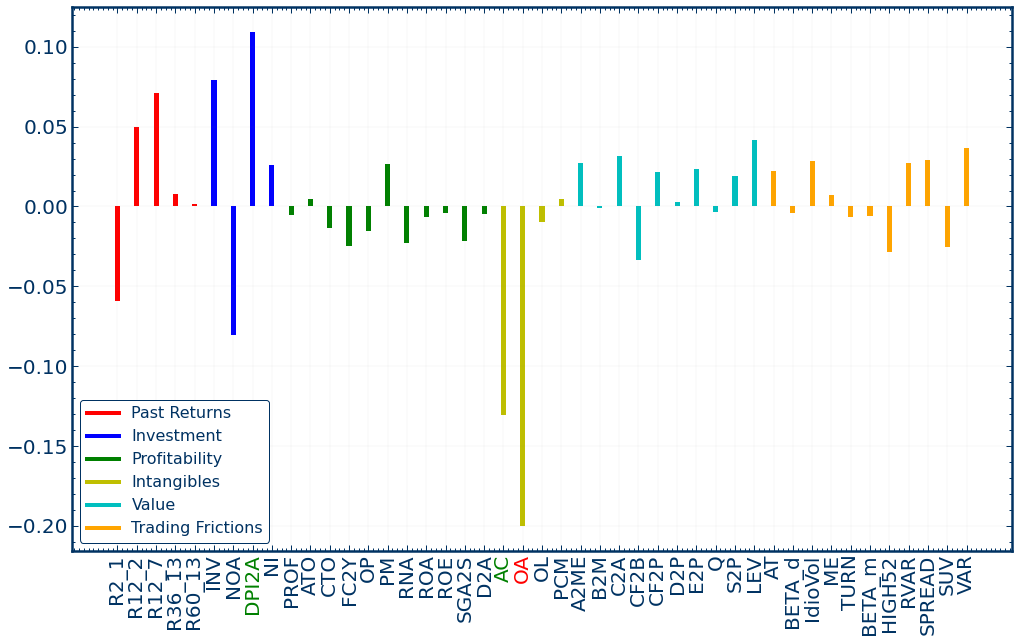

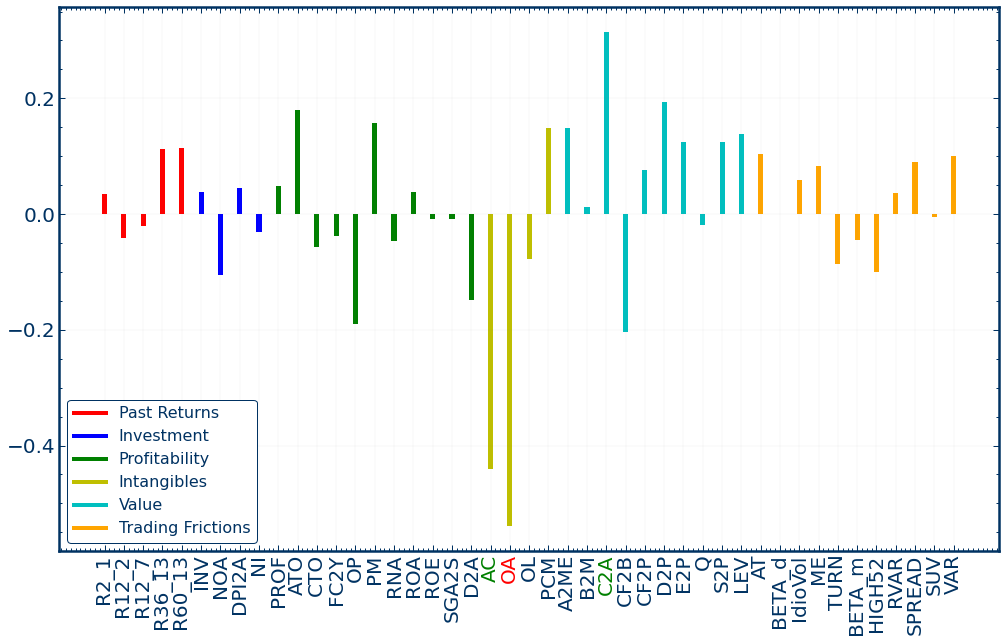

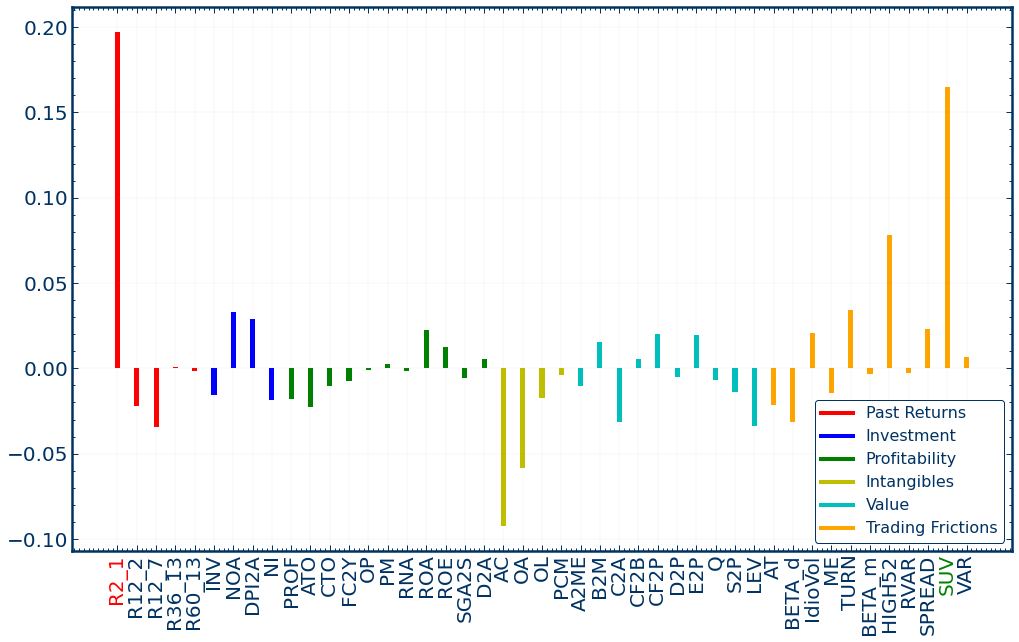

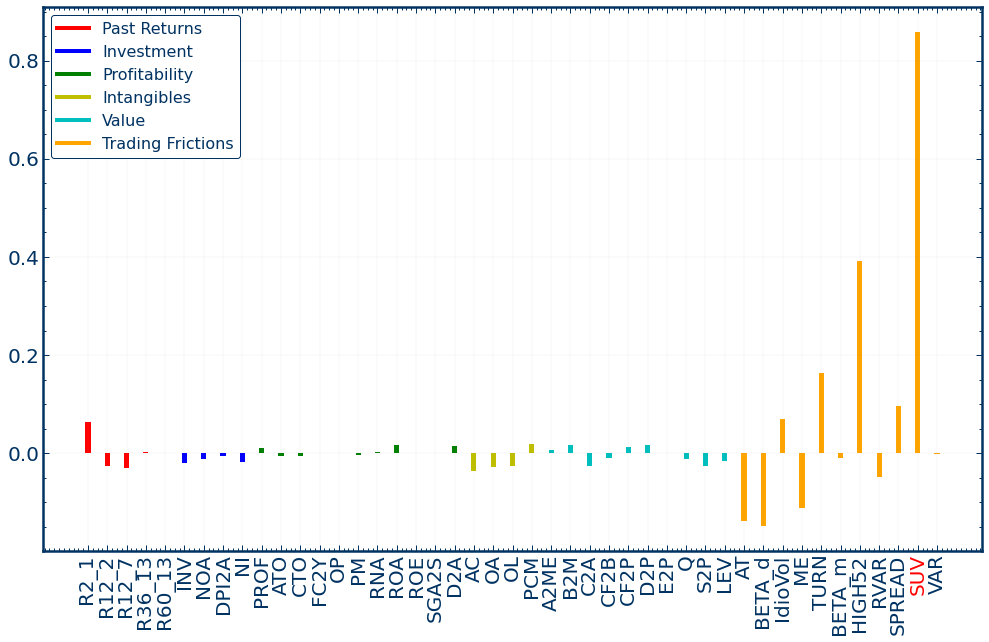

In [275]:
from python.plots_and_tables import revision, revision_utils
importlib.reload(revision_utils)
importlib.reload(revision)

result = revision.SparseFactors()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates)


In [12]:
from python.plots_and_tables import revision, revision_utils
importlib.reload(revision_utils)
importlib.reload(revision)

result = revision.SparseFactorsTable()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates)

<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   26.9s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   33.1s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   45.0s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   58.9s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.1min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.15499268495046714
lmbda_norms [[0.86 0.65 0.6  0.46 0.42 0.4  0.39 0.37 0.33 0.33]]
getting sparse lmbda
45 10 100
constructed problem
solved problem 9067.58311009407
before regression [73.18100486026387, 73.31709272522643, 72.62164054672708, 73.23670216302715, 72.34682333335182, 72.28664681213743, 72.6016192353322, 72.05701751694949, 72.38498095082083, 72.22544990238498, 72.59411089515262, 72.75922874523687, 72.4559466937103, 72.16720233497186, 71.80334954769144, 72.25073136193126, 72.03220292660205, 71.73118122791719, 72.22269342257795, 72.62284169493729, 72.28048979688974, 72.42376443938505, 72.40387029539971, 71.65555656130014, 72.90312150884506, 72.88418000855961, 72.52999177794506, 73.20175355373483]
[((4169, 10), (4169, 10)), ((4158, 10), (4158, 10)), ((4138, 10), (4138, 10)), ((4175, 10), (4175, 10)), ((4150, 10), (4150, 10)), ((4136, 10), (4136, 10)), ((4151, 10), (4151, 10)), ((4124, 10), (4124, 10)), ((4106, 10), (4106, 10)), ((4175, 10), (4

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   40.1s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   45.8s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   56.0s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.2min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.3min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.15235840187269803
lmbda_norms [[0.86 0.65 0.6  0.46 0.42 0.4  0.39 0.37 0.33 0.33]]
getting sparse lmbda
45 10 100
constructed problem
solved problem 9110.593580245972
before regression [73.7688167596473, 73.78773381116794, 73.17194430456885, 73.67697485903186, 72.98038820217012, 72.85741995288345, 73.11637313132668, 72.42751254538844, 72.83246972747341, 72.90095571415974, 73.2201386508522, 73.35330343740179, 73.11462155871048, 72.86263764222892, 72.46154114520681, 72.83872598963876, 72.68644379229023, 72.30407015079231, 72.92912555221083, 73.36725606714124, 72.98989348735375, 72.99254351147115, 73.01856516696644, 72.35561455400043, 73.44222768542811, 73.4042439436712, 73.09662314177748, 73.66012246512464]
[((4165, 10), (4165, 10)), ((4152, 10), (4152, 10)), ((4133, 10), (4133, 10)), ((4174, 10), (4174, 10)), ((4148, 10), (4148, 10)), ((4132, 10), (4132, 10)), ((4147, 10), (4147, 10)), ((4116, 10), (4116, 10)), ((4104, 10), (4104, 10)), ((4173, 10), (4

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   36.2s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   42.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   54.5s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.1min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.3min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.15312592453471008
lmbda_norms [[0.86 0.64 0.6  0.46 0.42 0.4  0.39 0.37 0.33 0.33]]
getting sparse lmbda
45 10 100
constructed problem
solved problem 10423.718416690826
before regression [73.40194451417791, 73.48937540516135, 72.96479696855485, 73.53853492653177, 72.68348378203231, 72.58724659112546, 72.86445804470425, 72.38626167723821, 72.70316407464509, 72.61311160706828, 72.94680995202306, 73.12441526858525, 72.77276151065917, 72.50487103581374, 72.14810617965793, 72.4907222239964, 72.28990971848522, 71.98563001572954, 72.53192210513922, 72.9974966788318, 72.60079194833337, 72.751936520723, 72.77457140352183, 72.16410785902087, 73.20181234761517, 73.29044637444049, 73.01291006591396, 73.61620358726421]
[((4164, 10), (4164, 10)), ((4151, 10), (4151, 10)), ((4134, 10), (4134, 10)), ((4170, 10), (4170, 10)), ((4148, 10), (4148, 10)), ((4134, 10), (4134, 10)), ((4146, 10), (4146, 10)), ((4121, 10), (4121, 10)), ((4103, 10), (4103, 10)), ((4173, 10), (4

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   44.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   57.7s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  2.1min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.15192111760025118
lmbda_norms [[0.85 0.64 0.59 0.46 0.41 0.4  0.38 0.36 0.33 0.32]]
getting sparse lmbda
45 10 100
constructed problem
solved problem 11370.830859422684
before regression [71.80717015465389, 72.04617752978872, 71.32639659870057, 71.75904149611164, 70.79451734714281, 70.7763345416514, 70.95459128888831, 70.44870520600169, 70.90882066615475, 70.58939742407229, 70.98682399932217, 71.207007612812, 70.8952701351702, 70.60849118197018, 70.26866821832202, 70.45365195498262, 70.32268084381592, 70.22147913980442, 70.61607626883773, 71.0123769556189, 70.74209963930552, 70.63008641634626, 70.5894642134757, 69.84923593452906, 71.02308743293024, 71.0299227882313, 70.77761586469461, 71.04654061052521]
[((4163, 10), (4163, 10)), ((4152, 10), (4152, 10)), ((4132, 10), (4132, 10)), ((4165, 10), (4165, 10)), ((4140, 10), (4140, 10)), ((4130, 10), (4130, 10)), ((4138, 10), (4138, 10)), ((4114, 10), (4114, 10)), ((4098, 10), (4098, 10)), ((4159, 10), (4159

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [13]:
result.metrics

[('_in_sample', [0.25055, 0.24134, 0.26644]),
 ('_out_of_sample_MAR', [0.241, 0.23354, 0.25396]),
 ('_out_of_sample_block', [0.24164, 0.231, 0.25982]),
 ('_out_of_sample_logit', [0.29336, 0.27042, 0.3415])]

### Work TBD
- add sparse implementation into simple imputation method

In [8]:
import cvxpy as cp


# Generalized corr stuff

- Look at generalized core with 
- - Factor-managed portfolios
- - Pcs of characteristic managed portfolios


<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   28.7s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:  1.0min
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  2.1min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  3.5min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  4.4min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.03773340514486582
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    9.2s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   43.4s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  3.2min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  4.0min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.04156505247021829
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    5.9s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   27.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  1.2min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  2.1min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  2.6min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.04159286426533307


  0%|                                                                                                    | 0/44 [00:00<?, ?it/s]

(522, 45) (45, 45)



  2%|██                                                                                          | 1/44 [00:19<13:39, 19.05s/it]

(522, 45) (45, 45)



  5%|████▏                                                                                       | 2/44 [00:34<11:52, 16.96s/it]

(522, 45) (45, 45)



  7%|██████▎                                                                                     | 3/44 [00:50<11:10, 16.35s/it]

(522, 45) (45, 45)



  9%|████████▎                                                                                   | 4/44 [01:12<12:22, 18.57s/it]

(522, 45) (45, 45)



 11%|██████████▍                                                                                 | 5/44 [01:44<15:14, 23.45s/it]

(522, 45) (45, 45)



 14%|████████████▌                                                                               | 6/44 [01:59<13:06, 20.70s/it]

(522, 45) (45, 45)



 16%|██████████████▋                                                                             | 7/44 [02:14<11:39, 18.92s/it]

(522, 45) (45, 45)



 18%|████████████████▋                                                                           | 8/44 [02:29<10:34, 17.63s/it]

(522, 45) (45, 45)



 20%|██████████████████▊                                                                         | 9/44 [02:44<09:46, 16.75s/it]

(522, 45) (45, 45)



 23%|████████████████████▋                                                                      | 10/44 [02:59<09:11, 16.21s/it]

(522, 45) (45, 45)



 25%|██████████████████████▊                                                                    | 11/44 [03:15<08:53, 16.15s/it]

(522, 45) (45, 45)



 27%|████████████████████████▊                                                                  | 12/44 [03:34<09:06, 17.09s/it]

(522, 45) (45, 45)



 30%|██████████████████████████▉                                                                | 13/44 [03:51<08:46, 16.99s/it]

(522, 45) (45, 45)



 32%|████████████████████████████▉                                                              | 14/44 [04:08<08:26, 16.89s/it]

(522, 45) (45, 45)



 34%|███████████████████████████████                                                            | 15/44 [04:24<08:00, 16.58s/it]

(522, 45) (45, 45)



 36%|█████████████████████████████████                                                          | 16/44 [04:43<08:07, 17.40s/it]

(522, 45) (45, 45)



 39%|███████████████████████████████████▏                                                       | 17/44 [04:59<07:38, 17.00s/it]

(522, 45) (45, 45)



 41%|█████████████████████████████████████▏                                                     | 18/44 [05:23<08:17, 19.12s/it]

(522, 45) (45, 45)



 43%|███████████████████████████████████████▎                                                   | 19/44 [05:49<08:47, 21.11s/it]

(522, 45) (45, 45)



 45%|█████████████████████████████████████████▎                                                 | 20/44 [06:06<07:55, 19.81s/it]

(522, 45) (45, 45)



 48%|███████████████████████████████████████████▍                                               | 21/44 [06:23<07:20, 19.14s/it]

(522, 45) (45, 45)



 50%|█████████████████████████████████████████████▌                                             | 22/44 [06:43<07:02, 19.22s/it]

(522, 45) (45, 45)



 52%|███████████████████████████████████████████████▌                                           | 23/44 [06:58<06:21, 18.16s/it]

(522, 45) (45, 45)



 55%|█████████████████████████████████████████████████▋                                         | 24/44 [07:17<06:04, 18.23s/it]

(522, 45) (45, 45)



 57%|███████████████████████████████████████████████████▋                                       | 25/44 [07:39<06:09, 19.43s/it]

(522, 45) (45, 45)



 59%|█████████████████████████████████████████████████████▊                                     | 26/44 [07:56<05:36, 18.72s/it]

(522, 45) (45, 45)



 61%|███████████████████████████████████████████████████████▊                                   | 27/44 [08:13<05:08, 18.15s/it]

(522, 45) (45, 45)



 64%|█████████████████████████████████████████████████████████▉                                 | 28/44 [08:59<07:03, 26.48s/it]

(522, 45) (45, 45)



 66%|███████████████████████████████████████████████████████████▉                               | 29/44 [10:16<10:26, 41.79s/it]

(522, 45) (45, 45)



 68%|██████████████████████████████████████████████████████████████                             | 30/44 [11:38<12:32, 53.74s/it]

(522, 45) (45, 45)



 70%|████████████████████████████████████████████████████████████████                           | 31/44 [13:15<14:29, 66.91s/it]

(522, 45) (45, 45)



 73%|██████████████████████████████████████████████████████████████████▏                        | 32/44 [14:45<14:45, 73.83s/it]

(522, 45) (45, 45)



 75%|████████████████████████████████████████████████████████████████████▎                      | 33/44 [16:05<13:49, 75.42s/it]

(522, 45) (45, 45)



 77%|██████████████████████████████████████████████████████████████████████▎                    | 34/44 [17:34<13:16, 79.60s/it]

(522, 45) (45, 45)



 80%|████████████████████████████████████████████████████████████████████████▍                  | 35/44 [18:52<11:51, 79.04s/it]

(522, 45) (45, 45)



 82%|██████████████████████████████████████████████████████████████████████████▍                | 36/44 [20:23<11:02, 82.82s/it]

(522, 45) (45, 45)



 84%|████████████████████████████████████████████████████████████████████████████▌              | 37/44 [21:38<09:23, 80.52s/it]

(522, 45) (45, 45)



 86%|██████████████████████████████████████████████████████████████████████████████▌            | 38/44 [23:55<09:43, 97.31s/it]

(522, 45) (45, 45)



 89%|███████████████████████████████████████████████████████████████████████████████▊          | 39/44 [25:52<08:36, 103.37s/it]

(522, 45) (45, 45)



 91%|██████████████████████████████████████████████████████████████████████████████████▋        | 40/44 [26:57<06:06, 91.68s/it]

(522, 45) (45, 45)



 93%|████████████████████████████████████████████████████████████████████████████████████▊      | 41/44 [27:19<03:32, 70.92s/it]

(522, 45) (45, 45)



 95%|██████████████████████████████████████████████████████████████████████████████████████▊    | 42/44 [27:40<01:51, 55.92s/it]

(522, 45) (45, 45)



 98%|████████████████████████████████████████████████████████████████████████████████████████▉  | 43/44 [28:06<00:47, 47.02s/it]

(522, 45) (45, 45)



100%|███████████████████████████████████████████████████████████████████████████████████████████| 44/44 [28:31<00:00, 38.89s/it]


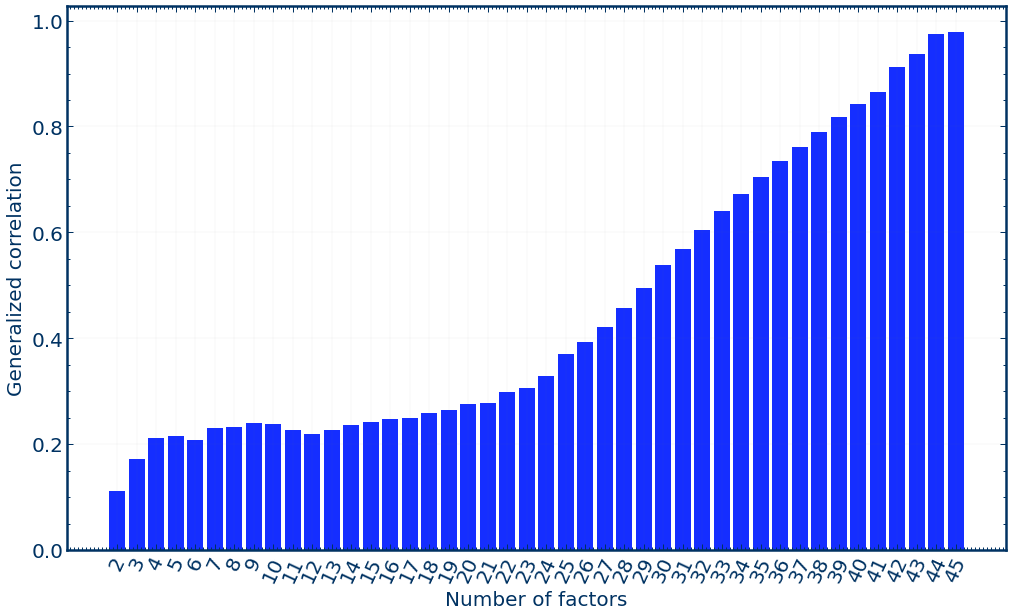

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &    2 &    3 &    4 &    5 &    6 &    7 &    8 &    9 &    10 &    11 &    12 &    13 &    14 &    15 &    16 &    17 &    18 &    19 &    20 &    21 &    22 &    23 &    24 &    25 &    26 &    27 &    28 &    29 &    30 &    31 &    32 &    33 &    34 &    35 &    36 &    37 &    38 &    39 &    40 &    41 &    42 &    43 &    44 &    45 \\
\midrule
2  & 0.22 & 0.34 & 0.57 & 0.60 & 0.67 & 0.80 & 0.88 & 0.93 & 0.94 & 0.94 & 0.96 & 1.03 & 1.04 & 1.10 & 1.12 & 1.20 & 1.22 & 1.31 & 1.37 & 1.41 & 1.47 & 1.49 & 1.50 & 1.54 & 1.55 & 1.56 & 1.57 & 1.59 & 1.61 & 1.62 & 1.63 & 1.65 & 1.66 & 1.70 & 1.72 & 1.74 & 1.76 & 1.76 & 1.79 & 1.79 & 1.81 & 1.83 & 1.84 & 1.84 \\
3  & 0.40 & 0.52 & 0.70 & 0.70 & 0.79 & 1.05 & 1.15 & 1.21 & 1.24 & 1.25 & 1.27 & 1.30 & 1.39 & 1.56 & 1.58 & 1.65 & 1.67 & 1.76 & 1.84 & 1.88 & 1.98 & 1.98 & 2.00 & 2.09 & 2.09 & 2.10 & 2.11 & 2.15 & 2.16 & 2.21 & 2.23 & 2.25 & 2.30 & 2.36 & 2.36 & 2.40 

In [8]:
from python.plots_and_tables import revision, revision_utils
importlib.reload(revision_utils)
importlib.reload(revision)

result = revision.ReturnFactorGeneralizedCorr()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, rts)
print(result.data_df.to_latex())
result.run()

<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   15.8s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   30.6s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   58.8s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.5min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.8min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.03773340514486582
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    3.1s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   13.8s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   32.6s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.1min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.5min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.04156505247021829
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   13.6s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   47.0s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.6min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  2.2min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.04159286426533307


  2%|██                                                                                          | 1/44 [00:03<02:49,  3.95s/it]

[0.58 4.09]


  5%|████▏                                                                                       | 2/44 [00:09<03:16,  4.69s/it]

[ -0.83   3.33 -13.84]


  7%|██████▎                                                                                     | 3/44 [00:14<03:21,  4.92s/it]

[  0.63  -4.49 -18.89 -10.47]


  9%|████████▎                                                                                   | 4/44 [00:19<03:18,  4.96s/it]

[ -1.99  -7.46 -18.63 -10.3   -9.79]


 11%|██████████▍                                                                                 | 5/44 [00:24<03:16,  5.03s/it]

[ -1.07  -7.08 -17.63 -14.06  -6.01  10.72]


 14%|████████████▌                                                                               | 6/44 [00:30<03:19,  5.26s/it]

[ -0.32  -6.5  -16.39 -13.24  -6.42  10.53  -5.31]


 16%|██████████████▋                                                                             | 7/44 [00:34<02:59,  4.86s/it]

[ -6.31   5.61 -14.67 -20.35  -5.22   8.36   5.1   40.54]


 18%|████████████████▋                                                                           | 8/44 [00:40<03:09,  5.25s/it]

[ -4.58   6.89 -21.99 -15.28  -7.08  11.46   3.27  41.64  21.28]


 20%|██████████████████▊                                                                         | 9/44 [00:47<03:21,  5.76s/it]

[ -3.2    6.11 -21.98 -17.27  -7.4    8.27   4.12  41.38  17.62 -31.01]


 23%|████████████████████▋                                                                      | 10/44 [00:54<03:27,  6.11s/it]

[ -4.32   4.89 -23.56 -17.71  -7.89   9.2    3.81  41.27  17.11 -31.25
   2.7 ]


 25%|██████████████████████▊                                                                    | 11/44 [01:02<03:46,  6.86s/it]

[ -4.01   5.15 -22.48 -17.82  -7.11   8.92   3.3   41.75  16.52 -31.86
   3.29   0.1 ]


 27%|████████████████████████▊                                                                  | 12/44 [01:10<03:53,  7.30s/it]

[ -4.77   6.27 -17.05 -20.85 -12.1    7.12   5.56  40.15  10.02 -32.23
   7.62  -3.56 -17.91]


 30%|██████████████████████████▉                                                                | 13/44 [01:18<03:49,  7.39s/it]

[ -8.17   6.05 -15.09 -22.89 -19.17   6.58   8.66  43.81  10.14 -34.5
   5.86  -4.09 -17.49  -2.2 ]


 32%|████████████████████████████▉                                                              | 14/44 [01:26<03:44,  7.49s/it]

[ -9.1    7.95 -16.49 -24.3  -15.16   8.43   7.95  45.27   7.94 -32.87
   5.88   2.44 -18.68  -1.06  20.85]


 34%|███████████████████████████████                                                            | 15/44 [01:33<03:33,  7.36s/it]

[ -6.47   5.1  -13.93 -25.87 -20.56  11.11   7.3   42.74   7.88 -33.95
   5.06   1.27 -15.69   2.58  20.08  13.13]


 36%|█████████████████████████████████                                                          | 16/44 [01:41<03:31,  7.57s/it]

[ -5.51  14.22 -24.02 -25.21 -16.77  13.96  10.31  46.64   8.05 -36.13
   6.81   4.46 -16.89   2.28  20.46   9.68 -18.47]


 39%|███████████████████████████████████▏                                                       | 17/44 [01:48<03:23,  7.55s/it]

[-17.66  13.15 -24.36 -22.65 -18.07  13.72  11.55  50.16  13.18 -35.72
   7.95   2.03 -10.51   2.44  16.75  10.48 -21.37 -15.07]


 41%|█████████████████████████████████████▏                                                     | 18/44 [01:56<03:15,  7.52s/it]

[-17.11  13.86 -24.1  -23.16 -17.43  13.74  12.99  50.12  12.99 -35.36
   6.61   2.92 -11.17   2.7   17.16  10.59 -21.61 -14.68   1.32]


 43%|███████████████████████████████████████▎                                                   | 19/44 [02:04<03:11,  7.67s/it]

[-16.61  14.72 -23.82 -23.62 -17.3   14.02  13.06  50.53  12.94 -35.73
   6.01   3.11 -10.69   2.63  17.18  11.29 -21.61 -14.52   1.11  -2.04]


 45%|█████████████████████████████████████████▎                                                 | 20/44 [02:15<03:30,  8.75s/it]

[-15.42   9.14 -16.14 -28.02 -21.94  16.47  12.16  47.74  12.29 -32.18
   7.46   0.01 -11.11   3.84  17.23   8.56 -22.09 -14.29   1.45   0.75
  11.29]


 48%|███████████████████████████████████████████▍                                               | 21/44 [02:26<03:35,  9.37s/it]

[-17.28   4.91 -21.12 -30.77 -32.75  15.66  11.05  51.45  13.94 -31.66
   6.3    0.95  -7.45   8.37  18.06   5.65 -23.1  -13.4    1.49   1.51
  10.61  -8.92]


 50%|█████████████████████████████████████████████▌                                             | 22/44 [02:35<03:25,  9.33s/it]

[-15.61   3.2  -19.4  -30.26 -32.5   15.41  10.38  48.56  13.35 -30.55
   5.24   1.14  -6.34   7.14  19.36   7.31 -21.76 -13.28   0.57   1.29
  10.31  -8.71  -1.29]


 52%|███████████████████████████████████████████████▌                                           | 23/44 [02:44<03:15,  9.32s/it]

[-14.82   5.58 -15.09 -32.14 -32.95  15.89   8.77  47.73  12.52 -31.05
   2.68   1.27  -5.74   5.4   20.07   6.92 -22.59 -12.54   1.21   2.83
  11.73  -7.96  -3.47  -5.17]


 55%|█████████████████████████████████████████████████▋                                         | 24/44 [02:54<03:07,  9.39s/it]

[-15.87   6.52 -13.7  -32.72 -39.84  15.53   5.14  48.65  14.98 -30.17
   4.97   0.15  -6.64   7.26  21.22   7.77 -22.16 -10.02   0.98   2.92
  12.21  -6.33  -2.24  -5.31   8.83]


 57%|███████████████████████████████████████████████████▋                                       | 25/44 [03:03<02:56,  9.28s/it]

[-16.31   5.16 -13.22 -32.65 -39.89  15.49   5.64  49.07  14.94 -30.23
   5.48   0.57  -6.86   7.99  21.95   6.79 -22.24 -10.37   0.83   2.55
  12.92  -6.29  -1.51  -4.8    8.9   -1.79]


 59%|█████████████████████████████████████████████████████▊                                     | 26/44 [03:15<02:59,  9.96s/it]

[-13.44   8.16 -17.28 -32.97 -42.1   18.64   4.19  47.43  12.62 -29.23
   8.06   0.41  -9.08   6.56  22.79   7.43 -23.74  -8.61   0.52   3.08
  12.85  -5.05  -1.06  -4.13   9.46  -2.98   8.07]


 61%|███████████████████████████████████████████████████████▊                                   | 27/44 [03:27<03:03, 10.80s/it]

[-12.42   7.75 -16.8  -32.97 -41.74  18.09   3.53  46.59  13.13 -29.59
   7.67   0.52  -7.54   6.97  22.42   8.09 -23.05  -9.2   -0.97   2.48
  12.5   -5.51  -0.07  -4.36   9.71  -2.8    8.08   1.97]


 64%|█████████████████████████████████████████████████████████▉                                 | 28/44 [03:38<02:54, 10.88s/it]

[-14.31   3.68 -17.1  -35.01 -43.93  20.24   1.26  44.16  12.18 -28.89
   9.83  -1.01  -5.93   7.78  23.2    8.05 -21.7   -9.75  -1.21   1.9
  11.95  -5.57   0.05  -5.38   9.95  -2.28   9.49   1.59  -2.23]


 66%|███████████████████████████████████████████████████████████▉                               | 29/44 [03:52<02:56, 11.78s/it]

[-13.26   1.83 -14.51 -39.92 -41.9   23.08  -1.73  43.23  12.45 -31.81
  10.36  -3.54  -5.9    7.35  22.57   9.84 -21.87 -10.23  -2.46   1.79
  11.45  -4.63   1.13  -5.05   9.29  -1.25  10.47   0.31  -1.56  -6.29]


 68%|██████████████████████████████████████████████████████████████                             | 30/44 [04:08<02:59, 12.85s/it]

[-14.09   2.07 -13.19 -39.38 -44.84  22.55  -1.6   43.28  13.16 -33.14
  11.15  -3.86  -6.63   7.54  21.94   9.11 -22.08  -9.61  -2.3    2.79
  11.46  -4.3    0.77  -5.25  10.04  -1.63  10.84   0.78  -1.14  -6.01
   1.79]


 70%|████████████████████████████████████████████████████████████████                           | 31/44 [04:24<03:01, 13.97s/it]

[-15.27   3.37 -13.7  -39.08 -43.32  23.34   0.89  42.63  13.29 -33.46
  11.63  -4.29  -8.56   6.71  21.27  10.82 -22.47  -9.76  -1.9    2.85
  11.52  -4.71   2.2   -5.35   8.94  -1.69  11.43   0.4   -0.97  -6.84
   1.65   2.37]


 73%|██████████████████████████████████████████████████████████████████▏                        | 32/44 [04:35<02:35, 12.94s/it]

[-12.82   8.96  -9.23 -37.3  -39.6   23.92  -0.41  41.78  11.94 -34.57
  14.08  -6.24 -12.42   5.27  20.42  10.56 -24.86  -9.73   0.07   2.99
  11.54  -4.14   2.    -6.31   9.    -3.39  11.58   0.4   -0.9   -5.86
   2.3    2.37   6.53]


 75%|████████████████████████████████████████████████████████████████████▎                      | 33/44 [04:51<02:34, 14.01s/it]

[-14.29   9.5  -11.87 -37.1  -40.01  23.76  -0.91  42.52  12.58 -35.18
  13.95  -6.42 -11.42   4.08  21.42  10.11 -25.28  -9.39  -0.14   2.92
  11.58  -4.21   2.04  -6.47   9.09  -3.29  11.27   0.9   -1.28  -6.3
   2.06   2.45   6.7    1.81]


 77%|██████████████████████████████████████████████████████████████████████▎                    | 34/44 [05:07<02:25, 14.58s/it]

[-15.13   8.27 -12.06 -37.86 -41.76  25.44  -0.53  40.56  14.21 -35.43
  12.73  -6.1  -10.44   4.81  21.06   8.71 -25.63  -9.68   0.01   3.18
  11.85  -4.26   2.89  -5.37   9.21  -3.22  10.47  -0.03  -1.34  -5.87
   2.03   2.31   6.38   1.82  -2.05]


 80%|████████████████████████████████████████████████████████████████████████▍                  | 35/44 [05:24<02:16, 15.21s/it]

[-15.4    8.91 -10.54 -38.42 -41.99  25.02  -1.76  40.31  14.12 -35.75
  11.67  -6.09 -11.64   5.11  21.2    7.73 -25.87  -9.56   0.86   3.33
  12.15  -3.3    2.22  -5.39   9.21  -3.28  10.08   0.63  -1.12  -5.51
   2.1    2.25   6.47   1.72  -1.99  -0.14]


 82%|██████████████████████████████████████████████████████████████████████████▍                | 36/44 [05:47<02:21, 17.65s/it]

[-12.71   8.38  -4.75 -36.38 -44.26  24.22  -2.65  37.75  13.32 -37.72
  10.87  -8.83 -12.53   3.24  21.21  10.71 -25.25  -8.79   1.07   4.39
  12.21  -3.15   2.32  -6.23  10.01  -2.68  10.33   0.18  -0.98  -6.61
   2.45   2.29   6.47   0.82  -2.13  -0.39  -1.12]


 84%|████████████████████████████████████████████████████████████████████████████▌              | 37/44 [06:13<02:19, 19.95s/it]

[-16.67   8.95  -7.32 -37.43 -46.99  23.04  -1.05  41.39  12.05 -37.33
  14.72 -10.99 -13.04   4.25  19.72   9.85 -25.39  -8.69   0.63   4.53
  13.42  -2.51   0.9   -4.28   8.12  -1.54  10.1    0.39   0.46  -6.32
   1.47   1.51   5.52   0.62  -2.1   -0.57  -0.95  -1.98]


 86%|██████████████████████████████████████████████████████████████████████████████▌            | 38/44 [06:37<02:07, 21.26s/it]

[-16.28   9.18  -6.75 -37.3  -47.11  23.32  -1.13  41.77  11.76 -37.75
  14.77 -10.92 -12.65   4.21  19.61  10.71 -25.15  -8.57   0.1    4.7
  13.6   -2.53   1.05  -4.08   8.04  -1.08  10.13   0.6    0.62  -6.24
   1.32   1.5    5.59   0.8   -2.32  -0.64  -1.05  -1.98  -0.83]


 89%|████████████████████████████████████████████████████████████████████████████████▋          | 39/44 [07:02<01:51, 22.30s/it]

[-17.17   8.03  -8.62 -37.34 -45.85  22.76  -0.66  42.28  12.37 -37.07
  15.13 -12.79 -12.2    3.28  19.83  10.69 -24.65  -8.55  -0.67   5.05
  13.7   -3.49   0.93  -4.46   6.72  -0.54  10.34   1.09   0.38  -6.29
   1.11   1.67   5.31   0.71  -2.56  -0.7   -1.39  -1.96  -0.83   0.27]


 91%|██████████████████████████████████████████████████████████████████████████████████▋        | 40/44 [07:21<01:25, 21.41s/it]

[-19.21   7.85 -12.17 -36.49 -45.34  23.04  -1.21  43.37  13.   -35.82
  17.07 -14.33 -11.43   3.79  21.14   8.22 -25.03  -9.32  -0.28   6.45
  13.11  -3.4    0.7   -4.45   6.04  -0.52   9.26   1.06   0.61  -6.07
   1.78   1.57   5.26   0.65  -2.35  -0.14  -1.36  -1.83  -0.82   0.26
   0.05]


 93%|████████████████████████████████████████████████████████████████████████████████████▊      | 41/44 [07:40<01:02, 20.80s/it]

[-25.1    7.04 -19.82 -37.26 -46.13  23.06   0.49  39.28  13.6  -35.16
  15.77 -17.35 -13.26  10.5   23.41   3.74 -22.55  -9.47   0.5    6.71
  11.17  -3.17   0.68  -5.58   5.19   0.05   7.86  -2.51   0.71  -5.62
   0.82   2.89   4.63   0.88  -2.9   -0.01  -2.42  -0.89  -0.78   0.05
   0.11   0.19]


 95%|██████████████████████████████████████████████████████████████████████████████████████▊    | 42/44 [08:03<00:42, 21.25s/it]

[-24.13   7.1  -22.18 -36.65 -47.55  23.78   0.2   43.32  15.66 -36.16
  15.48 -18.81 -11.44   9.3   23.15   3.63 -23.22  -9.25   0.39   6.96
  11.19  -2.99  -0.04  -5.63   4.93   0.35   6.94  -2.28   0.34  -5.27
   0.7    2.54   4.55   1.07  -3.21  -0.05  -2.29  -0.98  -0.73   0.13
   0.06   0.22   0.42]


 98%|████████████████████████████████████████████████████████████████████████████████████████▉  | 43/44 [08:34<00:24, 24.24s/it]

[-19.75  12.32 -20.74 -36.33 -45.49  25.83  -2.62  44.05  14.98 -37.54
  14.9  -17.07 -10.26   7.98  23.12   4.28 -24.89  -9.49  -1.29   4.13
  12.84  -2.37   0.85  -5.34   6.65  -1.04   8.7   -1.33   0.81  -5.42
   0.28   2.23   4.81   0.8   -2.91  -0.45  -2.2   -1.83  -0.78  -0.71
   0.14   0.4    0.47   0.03]


100%|███████████████████████████████████████████████████████████████████████████████████████████| 44/44 [09:30<00:00, 12.98s/it]

[-19.32  19.62 -22.69 -39.96 -42.51  28.09  -1.36  44.91  16.23 -36.71
  16.22 -17.64 -13.47   8.2   23.57   1.77 -25.76  -9.67  -3.89   3.75
  12.5   -1.46   0.65  -5.91   7.2    0.03   7.51  -1.25  -0.57  -5.43
  -0.     1.46   5.46   0.01  -3.03  -0.91  -1.86  -2.07  -1.01  -0.79
   0.12   0.49   0.59   0.02   0.16]


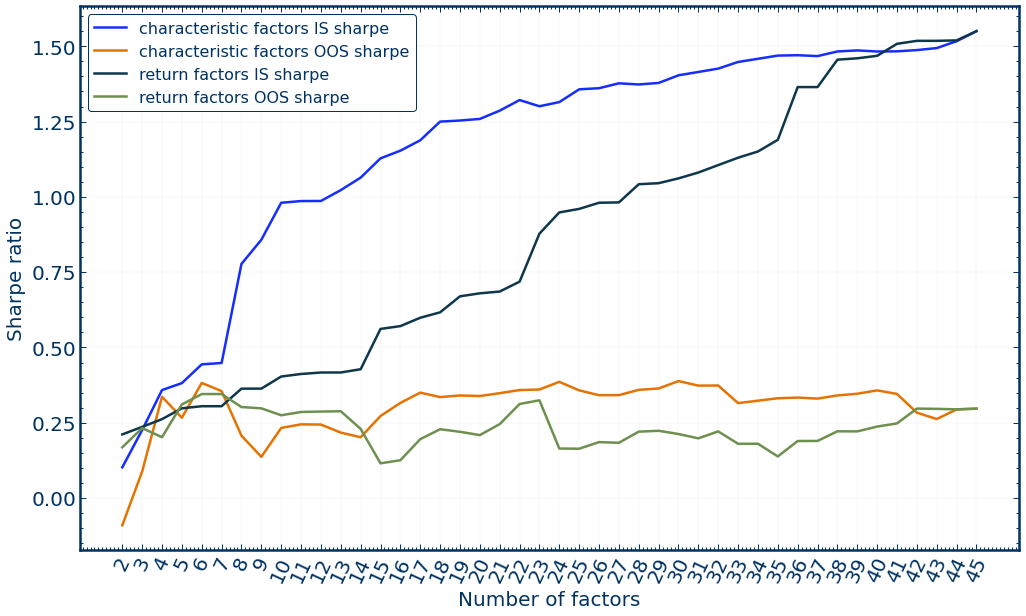

In [9]:
from python.plots_and_tables import revision, revision_utils
importlib.reload(revision_utils)
importlib.reload(revision)

result = revision.ReturnFactorSharpes()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, rts)

# Normalization Effecting Persistence

In [ ]:
percentile_rank_chars, regular_chars, chars, dates,\
    return_panel, permnos, rts, monthly_updates = data_loading.get_data_panel("../data/current/raw_chars_returns_df_yearly_fb_monthly_avg_mergedizes.fthr",
                                                            "../data/ff_rf.csv",
                                                                              computstat_data_present_filter=True,
                                                                              financial_firm_filter=False,
                                                                             start_date=19770000)

<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

 33%|███████████████████████████████████████████████████████                                                                                                              | 15/45 [01:04<02:02,  4.07s/it]/home/svenl/environments/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [11:52<00:00, 15.84s/it]


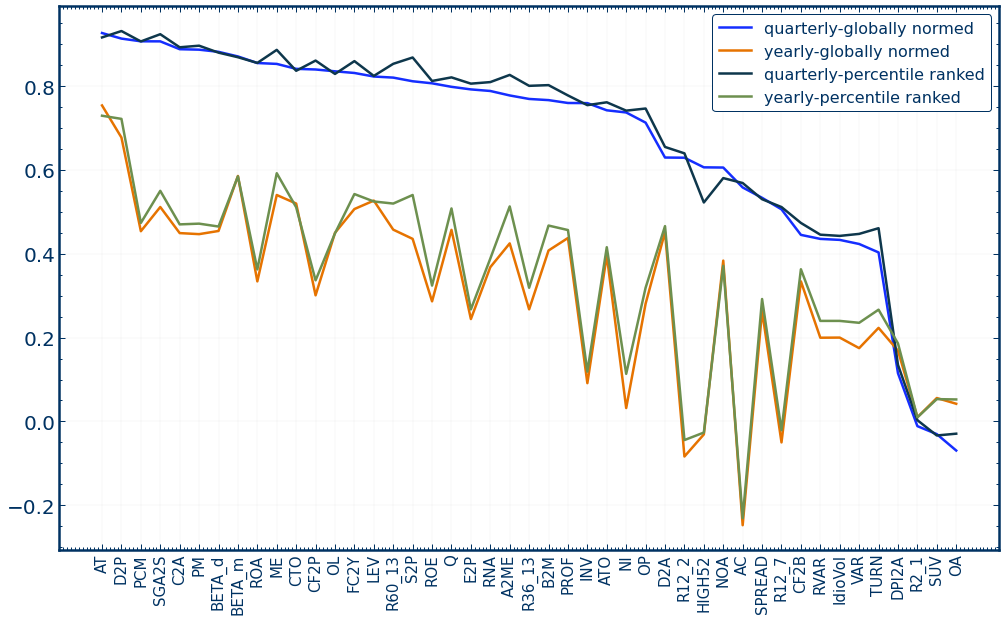

In [56]:
from python.plots_and_tables import revision, revision_utils
importlib.reload(revision_utils)
importlib.reload(revision)
ipc
result = revision.NormalizationPersistence()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates)

# time series modelling with more lags

In [23]:
from python.plots_and_tables import revision, revision_utils
importlib.reload(revision_utils)
importlib.reload(revision)

result = revision.TimeSeriesMoreLags()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, monthly_updates, char_map)

<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:  1.3min
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:  1.5min
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  2.5min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09557388284050261
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.7s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   19.4s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   50.1s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.5min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.8min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09460566428093577
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    3.2s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   13.2s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   38.7s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.2min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.5min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09418725796821056


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

/home/svenl/repos/research/pelger/missing_data_imputation/src/python/imputation_metrics.py:54: RuntimeWarning: Mean of empty slice
  mean_char_errors.append(np.nanmean(norm_func(diffs), axis=1))


allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   36.2s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   42.2s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   53.2s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.1min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.3min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09681093742720158
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.5s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   19.6s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   47.5s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.7min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09590333975856893
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.8s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   20.0s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   47.8s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.8min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09557735004198382


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:  1.0min
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:  1.2min
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  2.1min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09687227882692227
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    2.3s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    9.6s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   23.6s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   40.7s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   51.2s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09610310782290606
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    2.2s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    9.3s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   23.6s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   57.2s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.3min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09578510308508785


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:  1.2min
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  2.5min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  2.8min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09557388284050261
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.5s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   18.1s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   46.2s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.3min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.7min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09460566428093577
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.4s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   18.2s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   46.6s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.3min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.7min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09418725796821056


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   30.3s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   38.4s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   52.5s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.7min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09681093742720158
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.8s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   18.1s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   45.6s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.3min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.7min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09590333975856893
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.4s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   18.2s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   47.3s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.7min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09557735004198382


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   19.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   25.1s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   34.2s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   45.9s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   53.2s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09687227882692227
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.8s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.2s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   27.8s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   35.2s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09610310782290606
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.8s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   15.8s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   27.4s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   35.0s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09578510308508785


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   20.8s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   26.1s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   35.7s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   48.1s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   55.5s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09557388284050261
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.7s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.5s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   29.4s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   36.9s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09460566428093577
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.7s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.4s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   28.7s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   36.0s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09418725796821056


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   39.0s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   44.5s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   54.2s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.1min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.2min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09681093742720158
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.9s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   29.4s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   37.3s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09590333975856893
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.6s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   29.5s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   36.7s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09557735004198382


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   22.5s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   28.0s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   37.2s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   49.3s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   56.7s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09687227882692227
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.0s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.4s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   28.2s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   35.7s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09610310782290606
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.7s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   15.9s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   27.4s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   34.8s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09578510308508785


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [24]:
print(result.data_df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  MAR-Agg &  MAR-Q &  MAR-M &  BLOCK-Agg &  BLOCK-Q &  BLOCK-M &  LOGITAgg &  LOGITQ &  LOGITM \\
\midrule
1 lag  & 0.13 & 0.14 & 0.12 & 0.14 & 0.14 & 0.12 & 0.14 & 0.14 & 0.13 \\
2 lags & 0.17 & 0.17 & 0.18 & 0.17 & 0.17 & 0.18 & 0.17 & 0.17 & 0.18 \\
3 lags & 0.12 & 0.12 & 0.13 & 0.12 & 0.12 & 0.13 & 0.12 & 0.12 & 0.13 \\
\bottomrule
\end{tabular}



# Comparing bw-xs regression configs

In [21]:
from python import imputation_model_simplified
importlib.reload(imputation_model_simplified)
from python.plots_and_tables import revision, revision_utils
importlib.reload(revision_utils)
importlib.reload(revision)

result = revision.ComparisonOfModelConfigs()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, monthly_updates, char_map)



<module 'python.imputation_model_simplified' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/imputation_model_simplified.py'>

<module 'python.plots_and_tables.revision_utils' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision_utils.py'>

<module 'python.plots_and_tables.revision' from '/home/svenl/repos/research/pelger/missing_data_imputation/src/python/plots_and_tables/revision.py'>

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  13 tasks      | elapsed:   38.1s
[Parallel(n_jobs=30)]: Done 103 tasks      | elapsed:   55.1s
[Parallel(n_jobs=30)]: Done 229 tasks      | elapsed:  1.5min
[Parallel(n_jobs=30)]: Done 391 tasks      | elapsed:  2.2min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  2.5min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09557388284050261
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   19.2s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   45.6s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.3min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.7min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09460566428093577
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.2s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   17.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   44.8s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.3min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.6min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09418725796821056


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

/home/svenl/repos/research/pelger/missing_data_imputation/src/python/imputation_metrics.py:54: RuntimeWarning: Mean of empty slice
  mean_char_errors.append(np.nanmean(norm_func(diffs), axis=1))


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   39.7s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   45.2s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   55.5s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.1min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.3min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09681093742720158
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.9s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   29.5s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   37.2s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09590333975856893
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   19.2s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   36.6s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   46.7s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09557735004198382


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

allowing a mean False
shinking lmbda False
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:  1.3min
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:  1.6min
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:  1.9min finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 0 resids rmse are  0.09687227882692227
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.9s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   16.1s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   28.2s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   36.0s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 1 resids rmse are  0.09610310782290606
10 window size 1


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.8s
[Parallel(n_jobs=30)]: Done 228 tasks      | elapsed:   15.9s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   28.0s
[Parallel(n_jobs=30)]: Done 528 out of 528 | elapsed:   35.4s finished


  0%|          | 0/528 [00:00<?, ?it/s]

at iteration 2 resids rmse are  0.09578510308508785


  0%|          | 0/528 [00:00<?, ?it/s]

(22351, 45)


  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [22]:
print(result.data_df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &    0 &    1 &    2 &    3 &    4 &    5 &    6 &    7 &    8 \\
\midrule
xhat-t, x_t-1, e_t-1 & 0.14 & 0.14 & 0.13 & 0.17 & 0.17 & 0.18 & 0.12 & 0.12 & 0.13 \\
xhat-t, x_t-1        & 0.14 & 0.14 & 0.13 & 0.18 & 0.17 & 0.18 & 0.13 & 0.12 & 0.14 \\
xhat-t, e_t-1        & 0.15 & 0.16 & 0.15 & 0.18 & 0.18 & 0.18 & 0.14 & 0.13 & 0.15 \\
f-t, x_t-1, e_t-1    & 0.13 & 0.14 & 0.12 & 0.17 & 0.17 & 0.18 & 0.12 & 0.12 & 0.13 \\
f-t, x_t-1           & 0.14 & 0.14 & 0.13 & 0.17 & 0.17 & 0.18 & 0.13 & 0.12 & 0.13 \\
\bottomrule
\end{tabular}



In [50]:
print(result.data_df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &    0 &    1 &    2 &    3 &    4 &    5 &    6 &    7 &    8 \\
\midrule
xhat-t, x_t-1, e_t-1 & 0.16 & 0.16 & 0.16 & 0.18 & 0.17 & 0.19 & 0.15 & 0.15 & 0.16 \\
xhat-t, x_t-1        & 0.15 & 0.15 & 0.16 & 0.17 & 0.17 & 0.18 & 0.14 & 0.14 & 0.15 \\
xhat-t, e_t-1        & 0.17 & 0.16 & 0.18 & 0.18 & 0.17 & 0.19 & 0.16 & 0.15 & 0.17 \\
f-t, x_t-1, e_t-1    & 0.16 & 0.16 & 0.16 & 0.18 & 0.17 & 0.19 & 0.15 & 0.15 & 0.16 \\
f-t, x_t-1           & 0.15 & 0.15 & 0.16 & 0.17 & 0.17 & 0.18 & 0.14 & 0.14 & 0.15 \\
\bottomrule
\end{tabular}

